# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

## Reading Train Dataset

In [2]:
train = pd.read_csv("Train_Cleaned.csv")

## Calculating Total Number of Products for each month

In [12]:
train['total_prod'] = train.loc[: ,"Saving_account": "Direct_debit"].sum(axis=1)
train['total_prod'] = pd.to_numeric(train['total_prod'], errors ='coerce')

In [18]:
train[train['Segment'] == '01 - TOP']['Customer_ID'].unique()

array([1050360, 1051725, 1052121, ..., 1173595, 1164016, 1166395])

In [22]:
train[train['Relnshp_Mnths'] < 20]['Customer_ID'].unique()

array([1375586, 1050741, 1051017, ..., 1168909, 1173729, 1550586])

## Checking for NULL values

In [ ]:
train.isnull().sum()

Month_status_date         0
Customer_ID               0
Employee_Index            0
Customer_country          0
Sex                       0
Age                       0
Join_date                 0
New_customer              0
Relnshp_Mnths             0
Relnshp_flag              0
Last_date_Prim_Cust       0
Cust_type_beg_Mth         0
Cust_Reln_type_beg_mth    0
Residence_flag            0
Forigner_flag             0
Emp_spouse_flag           0
Channel_when_joined       0
Deceased_flag             0
Address_detail            0
Activity_flag             0
Gross_household_income    0
Segment                   0
Saving_account            0
Guarantees                0
Cur_account               0
Derivative_account        0
Payroll_account           0
Junior_account            0
Particular_acct1          0
Particular_acct2          0
Particular_acct3          0
Short_term_deposites      0
Med_term_deposites        0
Long_term_deposites       0
e-account                 0
Funds               

In [ ]:
train.Month_status_date = pd.to_datetime(train.Month_status_date, format="%Y-%m-%d")

In [ ]:
train.Join_date = pd.to_datetime(train.Join_date, format="%Y-%m-%d")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 46 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Month_status_date       datetime64[ns]
 1   Customer_ID             int64         
 2   Employee_Index          object        
 3   Customer_country        object        
 4   Sex                     object        
 5   Age                     int64         
 6   Join_date               datetime64[ns]
 7   New_customer            float64       
 8   Relnshp_Mnths           float64       
 9   Relnshp_flag            float64       
 10  Last_date_Prim_Cust     object        
 11  Cust_type_beg_Mth       object        
 12  Cust_Reln_type_beg_mth  object        
 13  Residence_flag          object        
 14  Forigner_flag           object        
 15  Emp_spouse_flag         object        
 16  Channel_when_joined     object        
 17  Deceased_flag           object        
 18  

#                                    SEASONALITY TREND IN THE DATASET



## Number of customer per month (From Janurary 2015 to May 2016)

In [ ]:
train['Month_status_yearmonth'] = train['Month_status_date'].apply(lambda x: (100*x.year) + x.month)
yearmonth = train['Month_status_yearmonth'].value_counts()

In [ ]:
yearmonth

201605    931453
201604    928274
201603    925076
201602    920904
201601    916269
201512    912021
201511    906109
201510    892251
201509    865440
201508    843201
201507    829817
201506    632110
201505    631957
201504    630367
201503    629209
201502    627394
201501    625457
Name: Month_status_yearmonth, dtype: int64

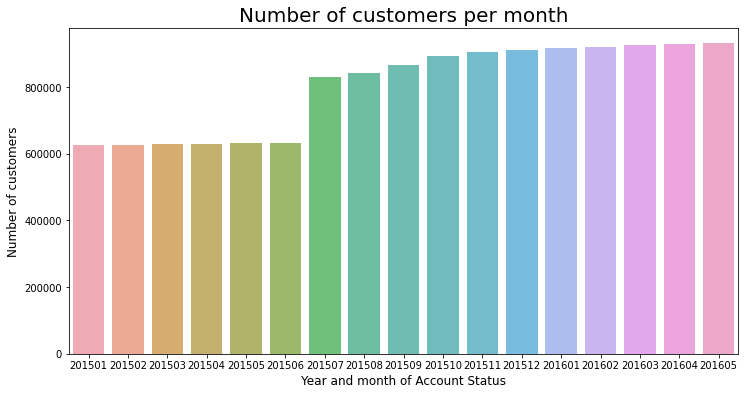

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(yearmonth.index, yearmonth.values, alpha=0.8)
plt.xlabel('Year and month of Account Status', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.title("Number of customers per month", fontsize=20)
plt.show()

In [ ]:
print(yearmonth.index, yearmonth.values)

Int64Index([201605, 201604, 201603, 201602, 201601, 201512, 201511, 201510,
            201509, 201508, 201507, 201506, 201505, 201504, 201503, 201502,
            201501],
           dtype='int64') [931453 928274 925076 920904 916269 912021 906109 892251 865440 843201
 829817 632110 631957 630367 629209 627394 625457]


#### OBSERVATION

We have almost steady customer numbers until june 2015, suddenly there has been increase in number of customers in july by almost 33%. There has been slight increase in custmomers until december 2016. then for next 5 months, again the customer numbers are pretty steady which shows the seasonlity in the dataset.

### Number of customer join the bank per month (From 1995 to 2016)

In [ ]:
train['Join_date_yearmonth'] = train['Join_date'].apply(lambda x: (100*x.year) + x.month)
yearmonth_join = train['Join_date_yearmonth'].value_counts()
yearmonth_join

201310    382473
201410    340613
201210    310295
201409    294752
201110    268133
           ...  
199508      3764
199504      2171
199503      1705
199501      1299
199502      1106
Name: Join_date_yearmonth, Length: 257, dtype: int64

Earliest Joining date 199501
Latest Joining date 201605


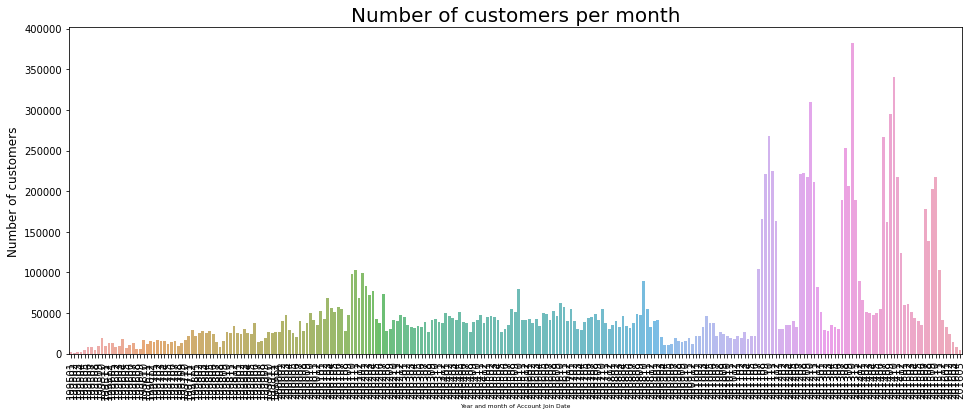

In [ ]:
print("Earliest Joining date",yearmonth_join.index.min())
print("Latest Joining date",yearmonth_join.index.max())
plt.figure(figsize=(16,6))
sns.barplot(yearmonth_join.index, yearmonth_join.values, alpha=0.8)
plt.xlabel('Year and month of Account Join Date', fontsize=6)
plt.ylabel('Number of customers', fontsize=12)
plt.title("Number of customers per month", fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

#### OBSERVATION

So we can see the seasonlity in the number of customer's joining the bank since 1995. As there are a lot of peaks and troughs in the data. Therefore we focused on last 3-4 years data.

In [ ]:
year_month = yearmonth_join.sort_index().reset_index()
year_month = year_month.iloc[192:,]
year_month.columns = ['yearmonth', 'number_of_customers']

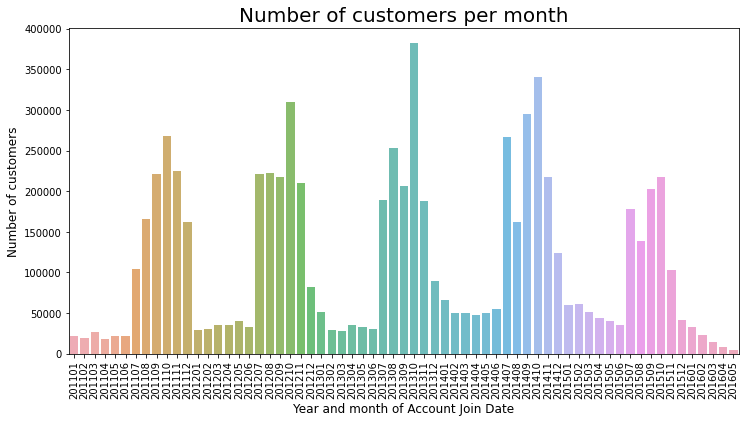

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(year_month.yearmonth.astype('int'), year_month.number_of_customers, alpha=0.8)
plt.xlabel('Year and month of Account Join Date', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.title("Number of customers per month", fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

#### OBSERVATION

Every year, first 6 months the customers are pretty much the same and there is increase in number of customers from July till October and then again the number of customers joining go down sharply and settles from Jan to Jun

In [ ]:
m17 = train[train['Month_status_yearmonth'] == 201605]

In [ ]:
len(m17)

931453

# COMPARISON OF PRODUCTS WITH RESPECT TO SEX AND ACTIVITY STATUS OF CUSTOMER

## Popularity of Product by Sex

Number of unique values in Customer Sex :  3


Text(0, 0.5, 'Number of Employees')

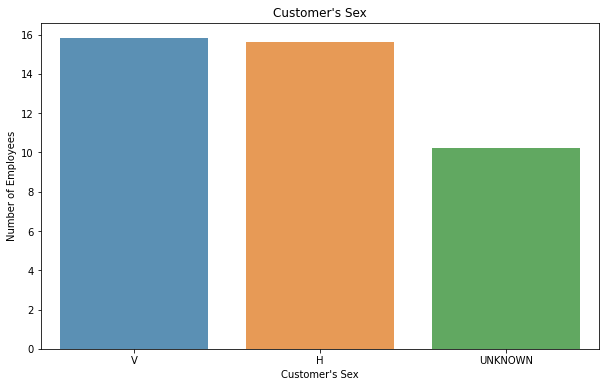

In [ ]:
cust_sex = train['Sex'].value_counts()
len_unique = len(cust_sex)
print("Number of unique values in Customer Sex : ",len_unique)

plt.figure(figsize=(10,6))
sns.barplot(cust_sex.index, np.log1p(cust_sex.values), alpha=0.8)
plt.title('Customer\'s Sex')
plt.xlabel('Customer\'s Sex')
plt.ylabel('Number of Employees')

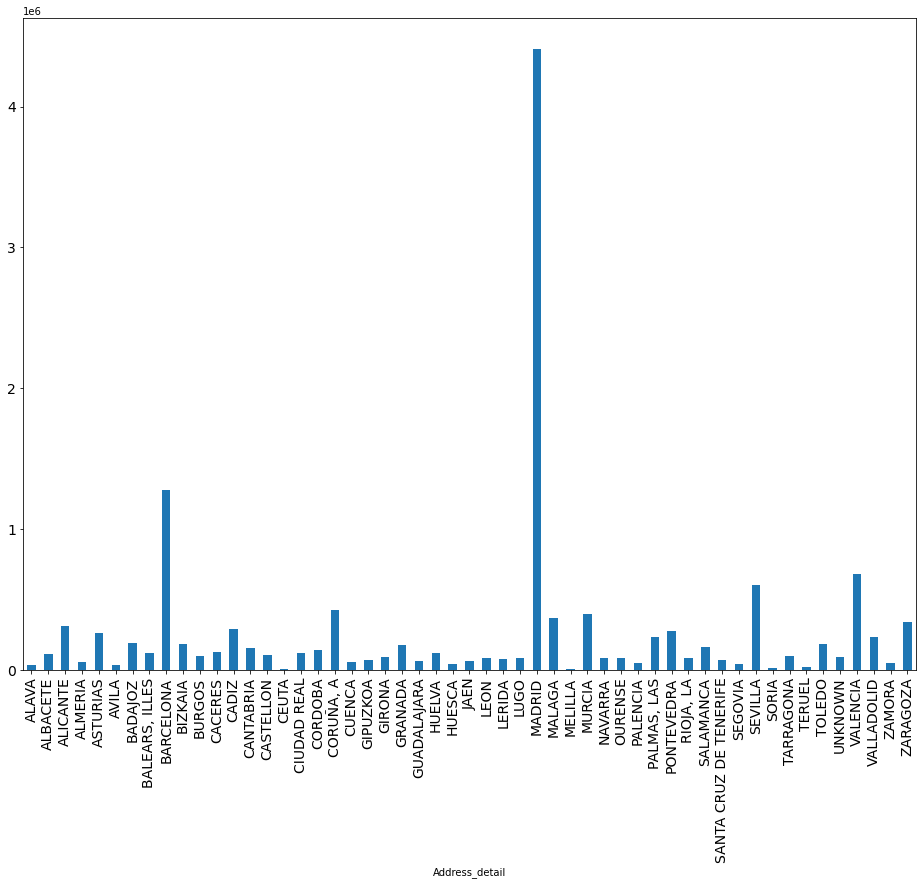

In [8]:
Add = train.groupby('Address_detail')['Customer_ID'].count()
Add.plot(kind='bar' , stacked=False, fontsize=14, figsize=[16,12])

#### Observation

Equal number of males and females.

Text(0, 0.5, 'Number of products')

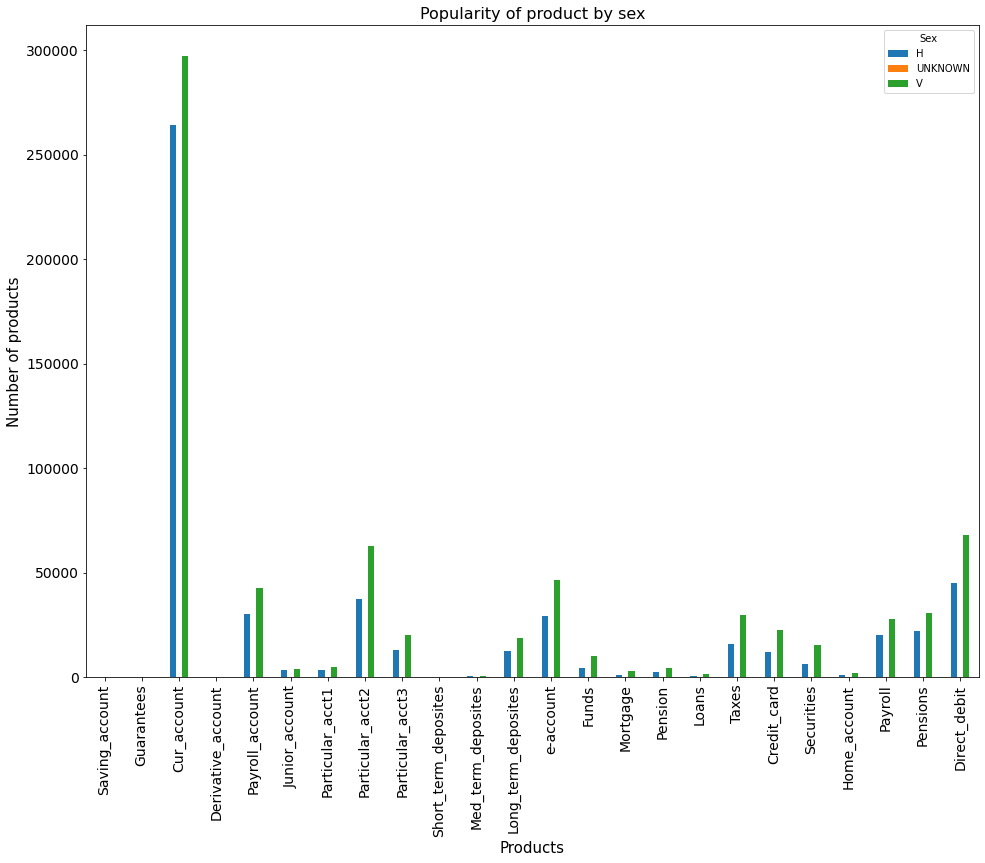

In [ ]:
#see product own by sex in month 17
sex_p = m17.loc[:, ['Sex' ]].join(m17.loc[: ,"Saving_account": "Direct_debit"])
sex_p = sex_p.groupby(['Sex']).sum()
sex_p = sex_p.T
sex_p.plot(kind='bar' , stacked=False, fontsize=14, figsize=[16,12])
plt.title('Popularity of product by sex', fontsize = 16)
plt.xlabel('Products',fontsize = 15)
plt.ylabel('Number of products', fontsize = 15)

#### OBSERVATION

The bank had almost equal number of males and females as customers, so couldn’t distinguish much using sex of the customers. There is no strong preference in products among males and females.

## Popularity of Product by Activity

Text(0, 0.5, 'Number of products')

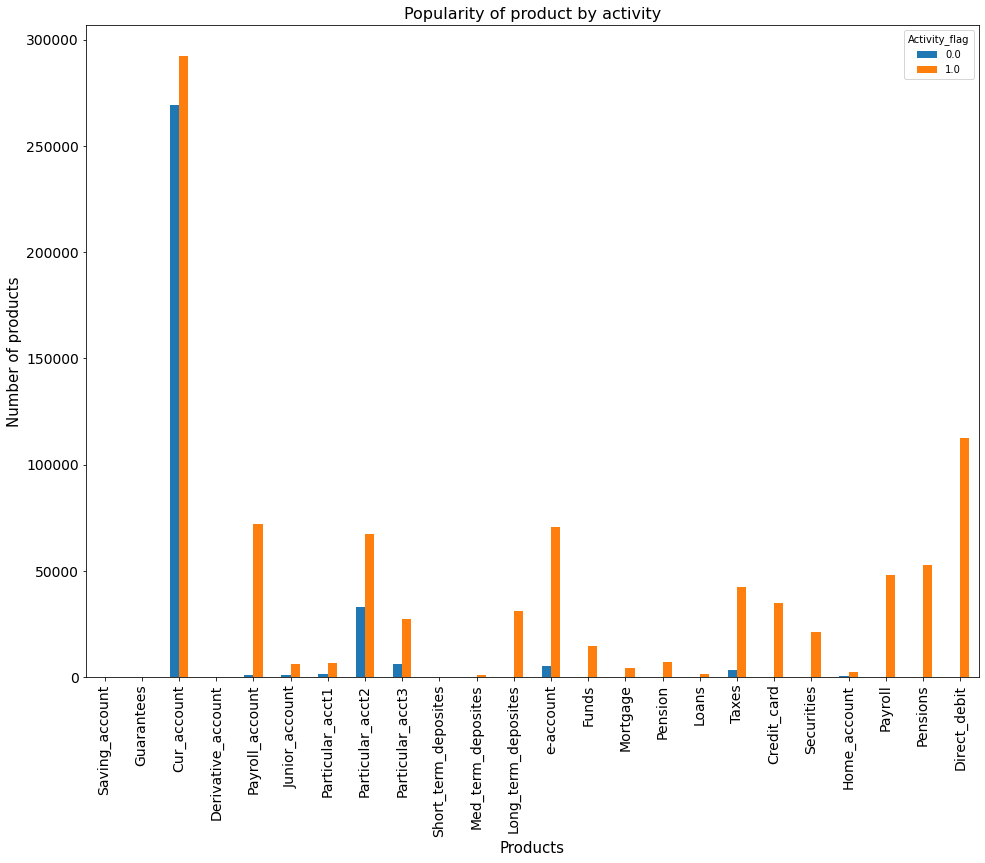

In [ ]:
#see product own by activity in month 17
ac_p = m17.loc[:, ['Activity_flag']].join(m17.loc[:, "Saving_account": "Direct_debit"])
ac_p= ac_p.groupby('Activity_flag').agg('sum')
ac_p= ac_p.T
ac_p.plot(kind='bar' , stacked=False, fontsize=14, figsize=[16,12])
plt.title('Popularity of product by activity', fontsize = 16)
plt.xlabel('Products',fontsize = 15)
plt.ylabel('Number of products', fontsize = 15)

#### OBSERVATION

- The products such as Direct Debit, Pensions, Payroll, Securities, Taxes, Pension, Mortgage, Funds, E-Account, Long_Term_Deposities, Med_Term_Deposities and Payroll_Account have almost fully Active Customer.

- Every product have more active customers than inactive customers.

## Popularity of products by sex and activity index

In [ ]:
df_a = train.loc[:, ['Sex', 'Activity_flag']].join(train.loc[:, 'Saving_account':'Direct_debit'])
df_a = df_a.groupby(['Sex', 'Activity_flag']).sum()
df_a = df_a.T

In [ ]:
df_a.head()

Sex                         H            UNKNOWN                V           
Activity_flag             0.0        1.0     0.0   1.0        0.0        1.0
Saving_account          130.0      212.0     0.0   0.0      244.0      810.0
Guarantees                0.0       81.0     0.0   0.0        0.0      235.0
Cur_account         2206458.0  1977400.0  7438.0  15.0  2091349.0  2662928.0
Derivative_account      119.0      624.0     4.0   0.0      382.0     4247.0
Payroll_account        6359.0   445073.0   604.0   0.0     7745.0   643839.0

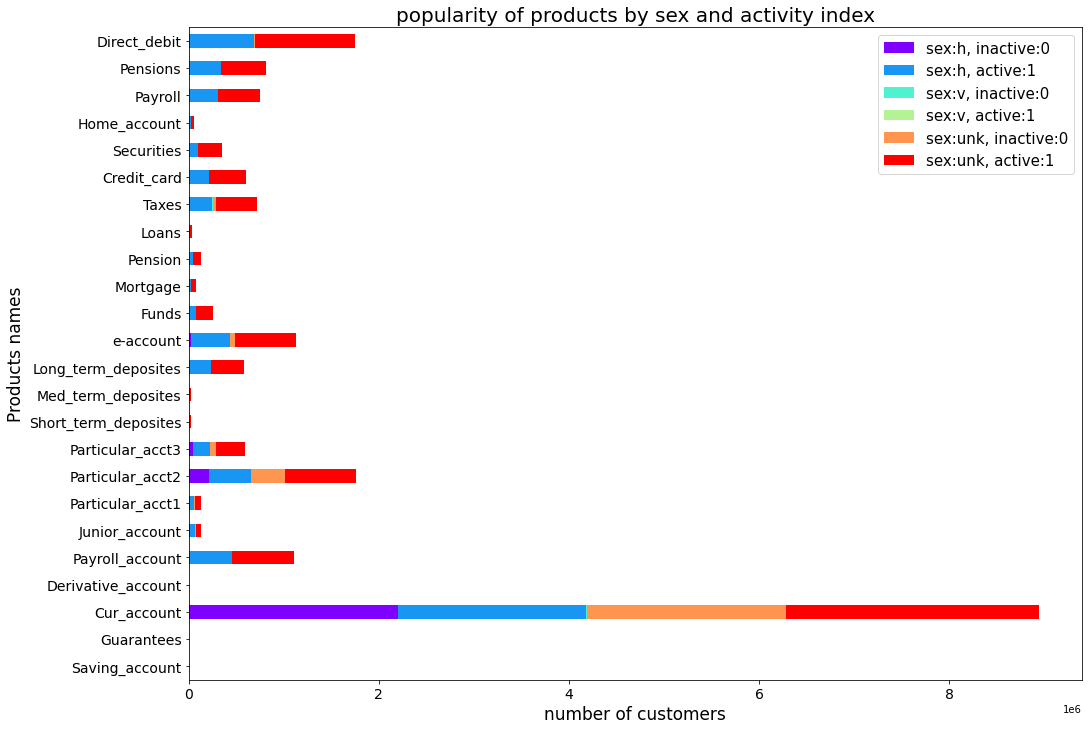

In [ ]:
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='rainbow')
plt.title('popularity of products by sex and activity index', fontsize=20)
plt.xlabel('number of customers', fontsize=17)
plt.ylabel('Products names', fontsize=17)
plt.legend(["sex:h, inactive:0", "sex:h, active:1", "sex:v, inactive:0", "sex:v, active:1", "sex:unk, inactive:0", "sex:unk, active:1"],
          prop={'size':15})

#### OBSERVATION

This graph shows that no matter what is the gender of the customers, the ‘current cash account’ was the dominated product among all. And, The popularity of product are as follows in their priority order: 1.Current Account, 2.Direct Debit, 3.Particular Account, 4.Payroll Account and 5. E-Account. Also, the majority of the account is hold by Active Customer.

# COMPARISON WITH RESPECT TO GROSS HOUSEHOLD INCOME

## Popularity of product by Gross household Income

/Users/gaurav/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


Text(0, 0.5, 'Number of products')

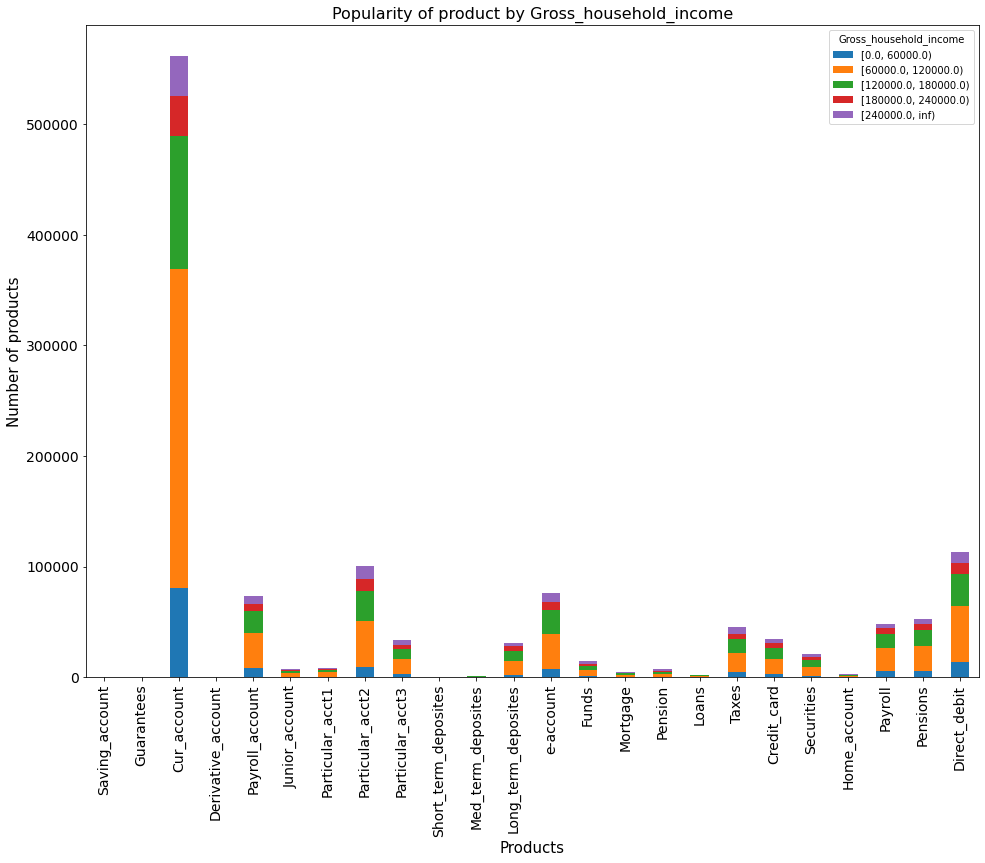

In [ ]:
#see product own by Gross_household_income in month 17
renta_p = (m17.groupby(pd.cut(m17['Gross_household_income'], [0,60000,120000,180000,240000, pd.np.inf], right=False)).sum())
renta_p = renta_p.loc[: ,"Saving_account": "Direct_debit"]
renta_p= renta_p.T
renta_p.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12])
plt.title('Popularity of product by Gross_household_income', fontsize = 16)
plt.xlabel('Products',fontsize = 15)
plt.ylabel('Number of products', fontsize = 15

#### OBSERVATION

Majority of any product holder have income range from 60K - 120K. These customer seemed to be users who bought more products, indicating that this could be an useful feature. This was later evident when we plotted feature importance from the XGBoost model, which showed household income as the most important feature.

## Median Income Distribution by City

([<matplotlib.axis.YTick at 0x7fc96edc47b8>,
 <a list of 5 Text major ticklabel objects>)

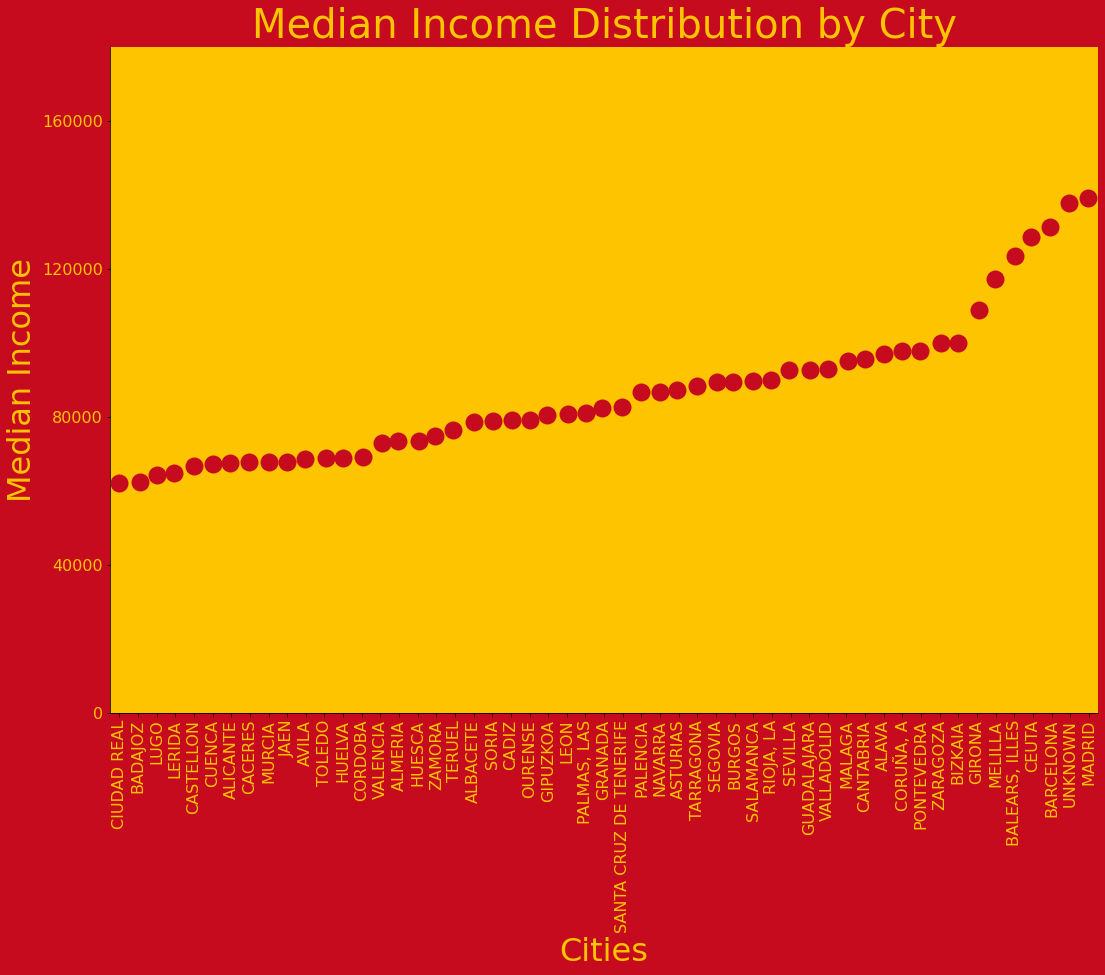

In [ ]:
# median Gross_household_income with respect to Address_detail or cities

# creating a dataframe consisting of Address_detail or cities and respective gross household income
cities_vs_gross_household_income=train.loc[:,['Address_detail','Gross_household_income']]

# grouping the data by cities and calculating the median gross_household_income with respect
# to a particular city
cities_vs_median_income=cities_vs_gross_household_income.groupby(['Address_detail']).median()

cities_vs_median_income.sort_values(by=('Gross_household_income'),inplace=True)
cities_vs_median_income.reset_index(inplace=True)
cities_vs_median_income

import seaborn as sns
# plotting the graph
with sns.axes_style({
        "axes.facecolor":   "#ffc400",
        "axes.grid"     :    False,
        "figure.facecolor": "#c60b1e"}):
    h = sns.catplot(data=cities_vs_median_income,
                   x="Address_detail",
                   y="Gross_household_income",
                   order=(i for i in cities_vs_median_income.Address_detail.unique()),
                   height=10,
                   s=18,
                   aspect=1.5,
                   color="#c60b1e")

plt.xticks(rotation=90)
plt.tick_params(labelsize=16,labelcolor="#ffc400")
plt.ylabel("Median Income",size=32,color="#ffc400")
plt.xlabel("Cities",size=32,color="#ffc400")
plt.title("Median Income Distribution by City",size=40,color="#ffc400")
plt.ylim(0,180000)
plt.yticks(range(0,180000,40000))

#### OBSERVATION

Customer from certain cities have higher median income than others like Madrid, Barcelona, Ceuta and Balears have comparatively higher median income than other. Also, later we will show that higher income customers tend to buy more products. So, cities and income have significant impact in terms of recommending the product.

# COMPARISON WITH RESPECT TO AGE

## Popularity of Product by Age

/Users/gaurav/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


Text(0, 0.5, 'Number of products')

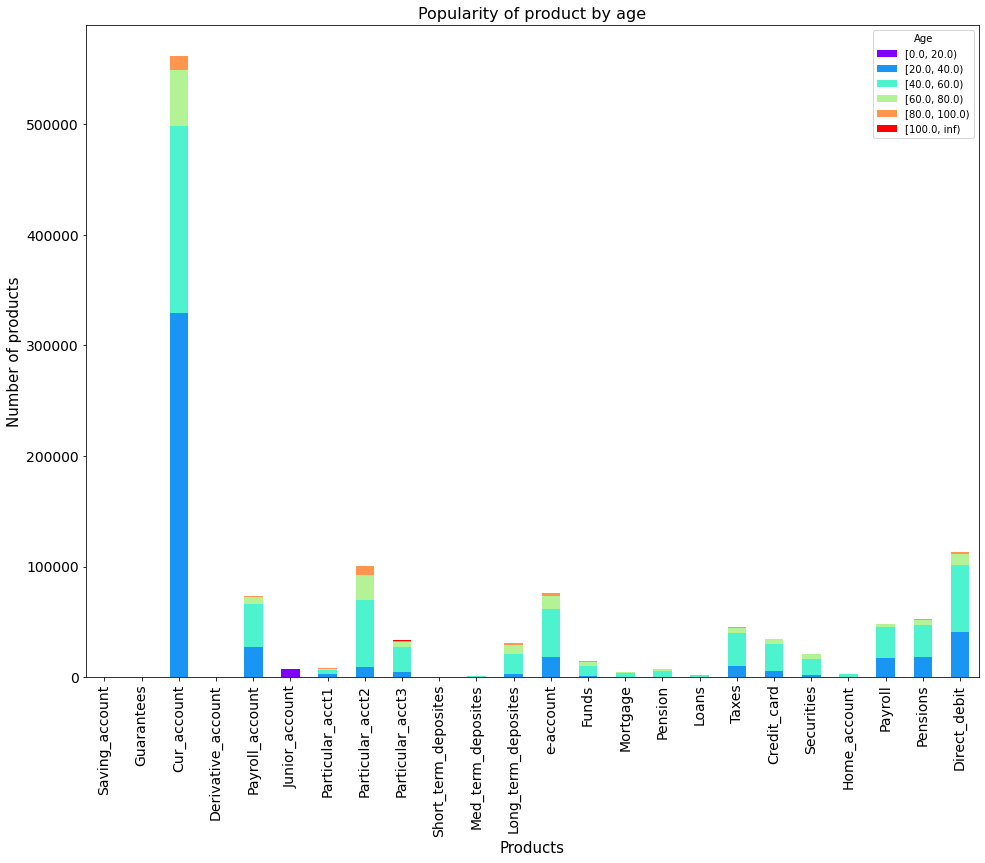

In [ ]:
#see product own by age range in month 17
age_p = (m17.groupby(pd.cut(m17['Age'], [0,20,40,60,80,100, pd.np.inf], right=False)).sum())
age_p = age_p.loc[: ,"Saving_account": "Direct_debit"]
age_p= age_p.T
age_p.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12], colormap = 'rainbow')
plt.title('Popularity of product by age', fontsize = 16)
plt.xlabel('Products',fontsize = 15)
plt.ylabel('Number of products', fontsize = 15)

#### OBSERAVTION

The junior Account is hold by only age group from 0-20 years old. The current account is majorly hold by customer with age group from 20-40 years old. Particular_Account is majorly hold by cutomer with age group within 40-60 years old.

## Product Distribution by Age

In [ ]:
df_age = train.loc[:,["Age"]].join(train.loc[:, "Saving_account": "Direct_debit"])
fnc = {c: 'sum' for c in df_age.columns.drop(['Age']).tolist()}

In [ ]:
df_age = df_age.groupby('Age').agg(fnc).reindex(df_age.columns.drop('Age'), axis=1)

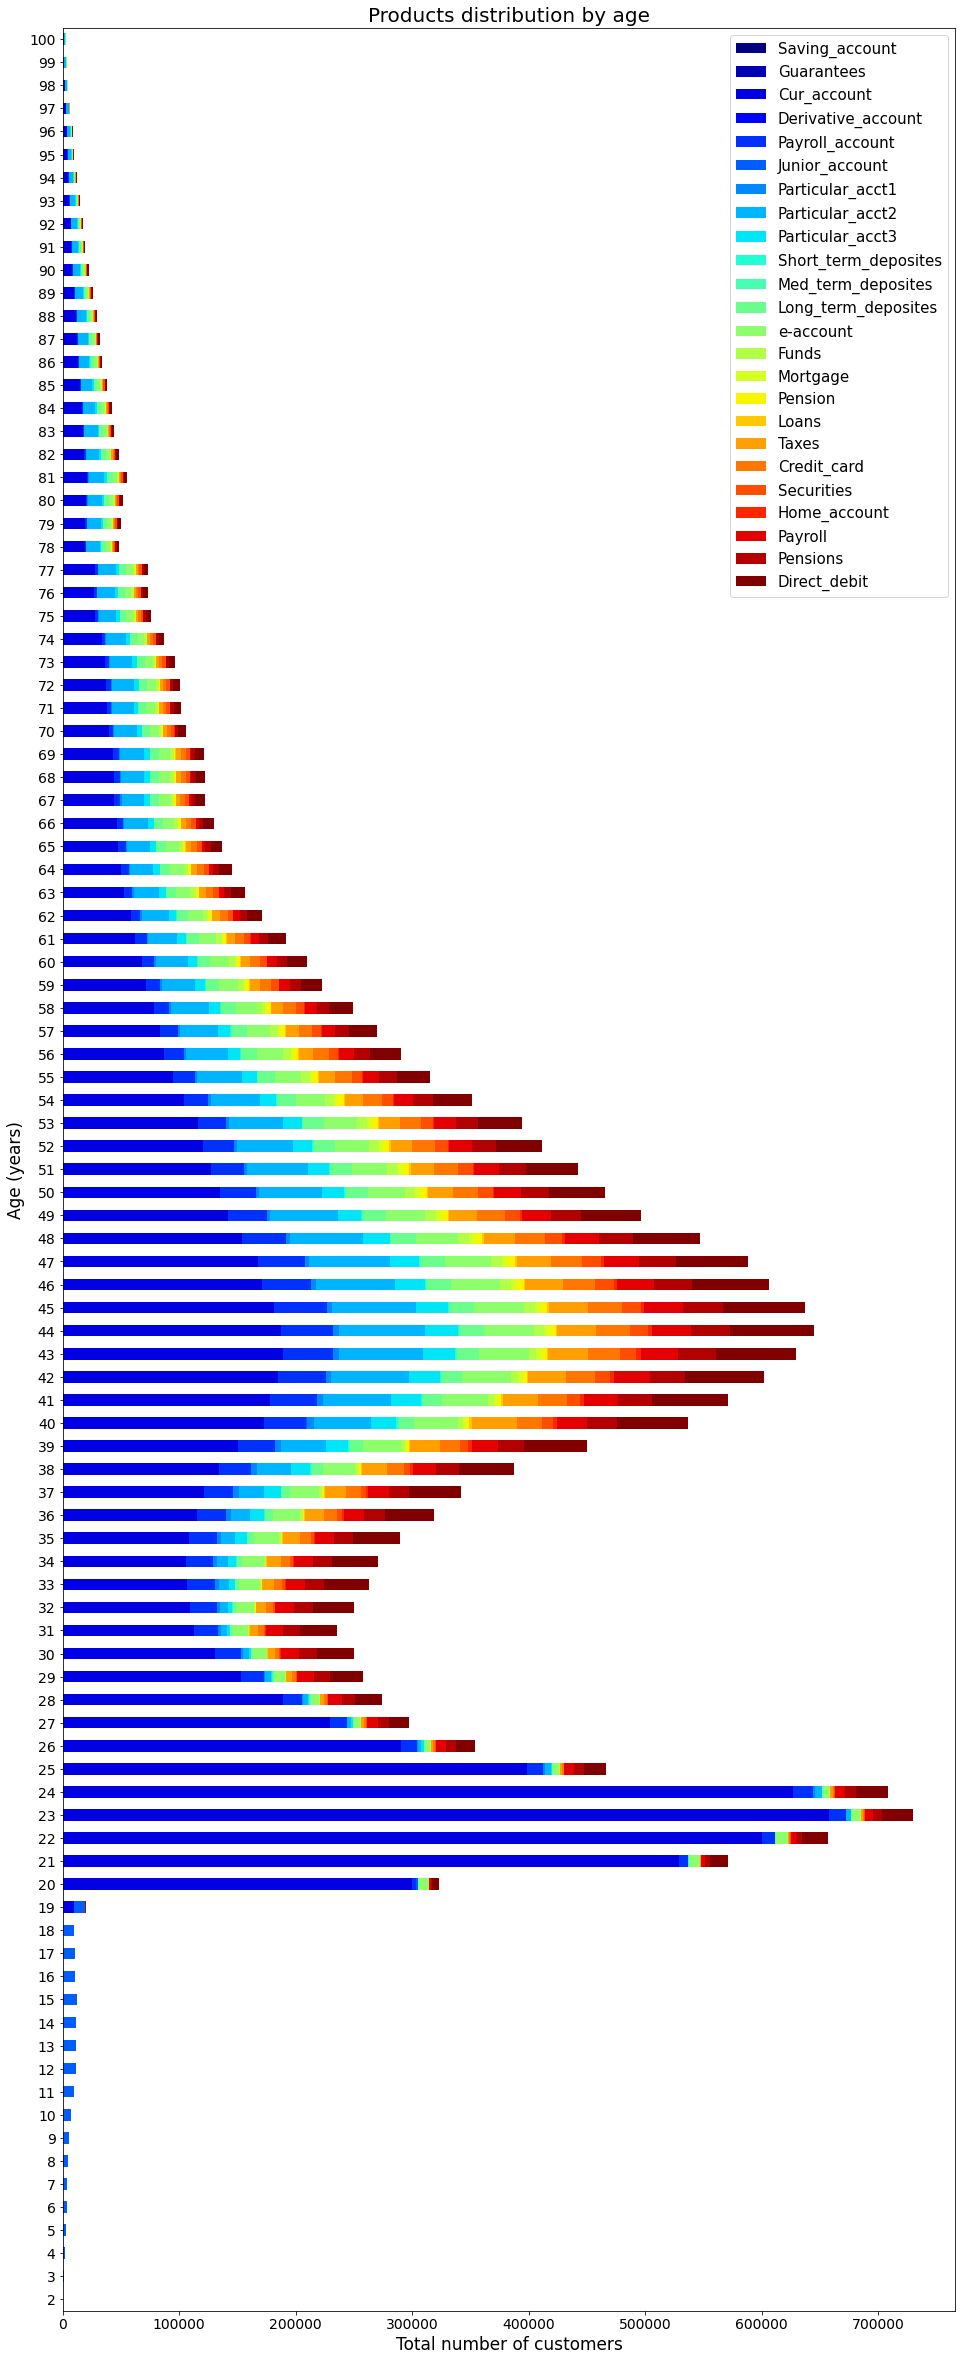

In [ ]:
# Products distribution by age
df_age.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,42], colormap='jet')
plt.title('Products distribution by age', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Age (years)', fontsize=17, color='black') 
plt.legend(prop={'size':15})

In [ ]:
train['tot_products'] = train.loc[:, "Saving_account": "Direct_debit"].sum(axis=1)
train['tot_products'] = pd.to_numeric(train['tot_products'], errors = 'coerce')

In [ ]:
df_a = train.groupby(['Age'])['tot_products'].agg('sum')

Text(0, 0.5, 'number of products')

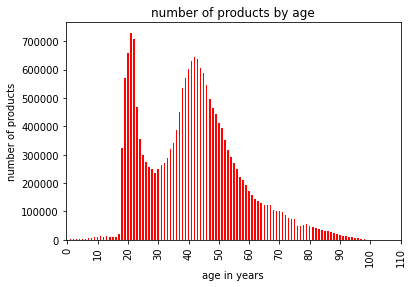

In [ ]:
df_a.plot(kind='bar', colormap='autumn', legend=None)
plt.xticks(np.arange(0, 120, 10), map(str, np.arange(0, 120, 10)))
plt.title('number of products by age')
plt.xlabel('age in years')
plt.ylabel('number of products')

#### OBSERVATION

Customer’s age also showed a clear distinction. Customer’s aged between 20 and 60, whom I had bucketed into 2 sets aged 20 & 40 and 40 & 60, seemed to show clear preferences towards the choice of products.

# COMPARISON WITH RESPECT TO SENIORITY

## Popularity of Product by Seniority

/Users/gaurav/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


Text(0, 0.5, 'Number of products')

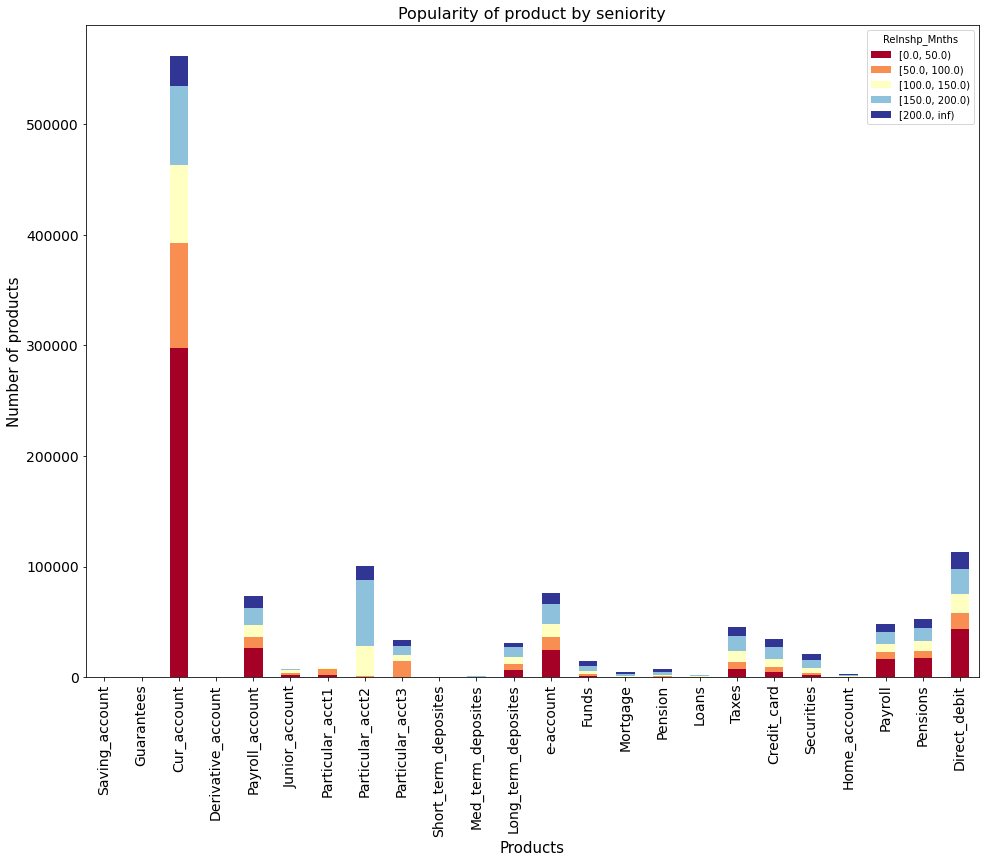

In [ ]:
#see product own by seniority in month 17
sen_p = (m17.groupby(pd.cut(m17['Relnshp_Mnths'], [0,50,100,150,200, pd.np.inf], right=False)).sum())
sen_p = sen_p.loc[: ,"Saving_account": "Direct_debit"]
sen_p= sen_p.T
sen_p.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12], colormap = 'RdYlBu')
plt.title('Popularity of product by seniority', fontsize = 16)
plt.xlabel('Products',fontsize = 15)
plt.ylabel('Number of products', fontsize = 15)

#### OBSERVATION

The Current Account and Direct Debit are mojorily hold by seniority group from 0-50 months. The Particular Account2 is majorily hold by seniority group from 150-200 months.

# COMPARISON WITH RESPECT TO SEGMENT

## Popularity of Product by Segment

In [ ]:
df_seg = train.loc[:, ['Segment']].join(train.loc[:, "Saving_account": "Direct_debit"])
df_seg = df_seg.groupby('Segment').agg('sum')
df_seg = df_seg.T

In [ ]:
df_seg.head()

Segment,01 - TOP,02 - PARTICULARES,03 - UNIVERSITARIO,UNKNOWN
Saving_account,115.0,1281.0,0.0,0.0
Guarantees,128.0,188.0,0.0,0.0
Cur_account,342911.0,4427518.0,4090434.0,84725.0
Derivative_account,1042.0,4283.0,45.0,6.0
Payroll_account,174163.0,758940.0,169285.0,1232.0


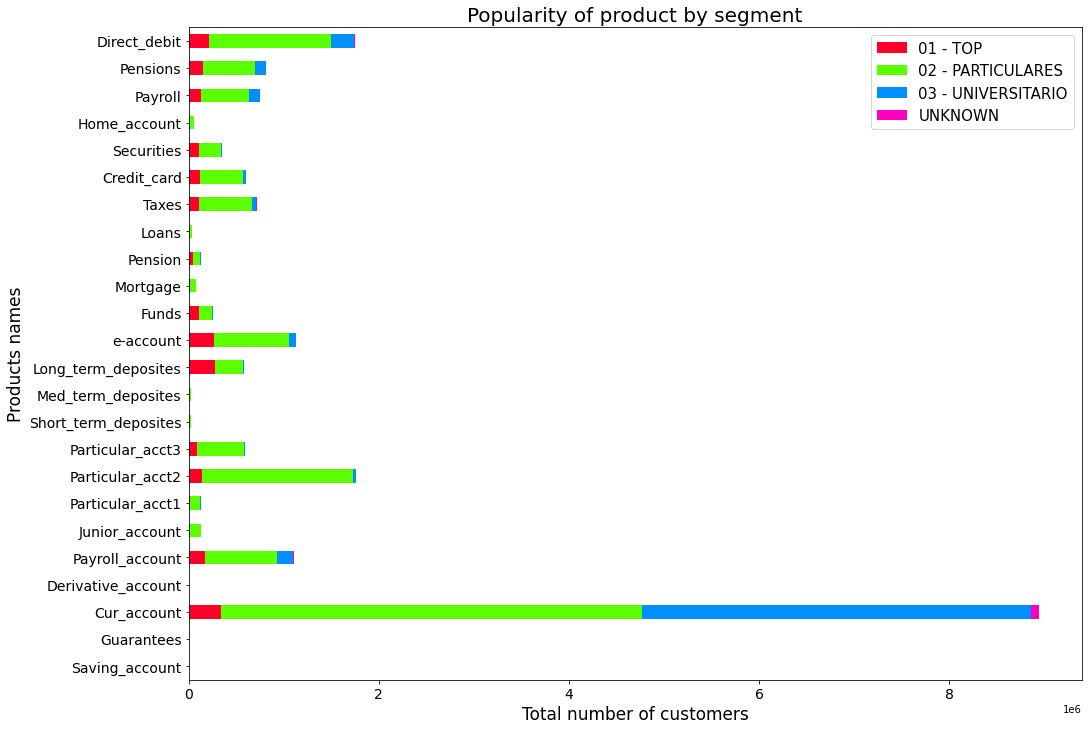

In [ ]:
# Customers segment of each product
df_seg.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Popularity of product by segment', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products names', fontsize=17, color='black') 
plt.legend(prop={'size':15})

#### OBSERVATION

Top - VIP Cutomer; Particulares - Individual Customer; Unversitario - College Graduate.

- Current Account are majorly hold by Individual and College gradute customer.
- Every Other Product are majorly hold by Individual.
- Junior Account, Particular Account, Mortgages, Loans and Home_account are almost majorly hold by Individual customer segment.

# COMPARISON WITH RESPECT TO CONSTOMER CITY

## Products distribution by Customer's City

In [3]:
df_address = train.loc[:,["Address_detail"]].join(train.loc[:, "Saving_account": "Direct_debit"])
fnc = {c: 'sum' for c in df_address.columns.drop(['Address_detail']).tolist()}

In [4]:
df_address = df_address.groupby('Address_detail').agg(fnc).reindex(df_address.columns.drop('Address_detail'), axis=1)

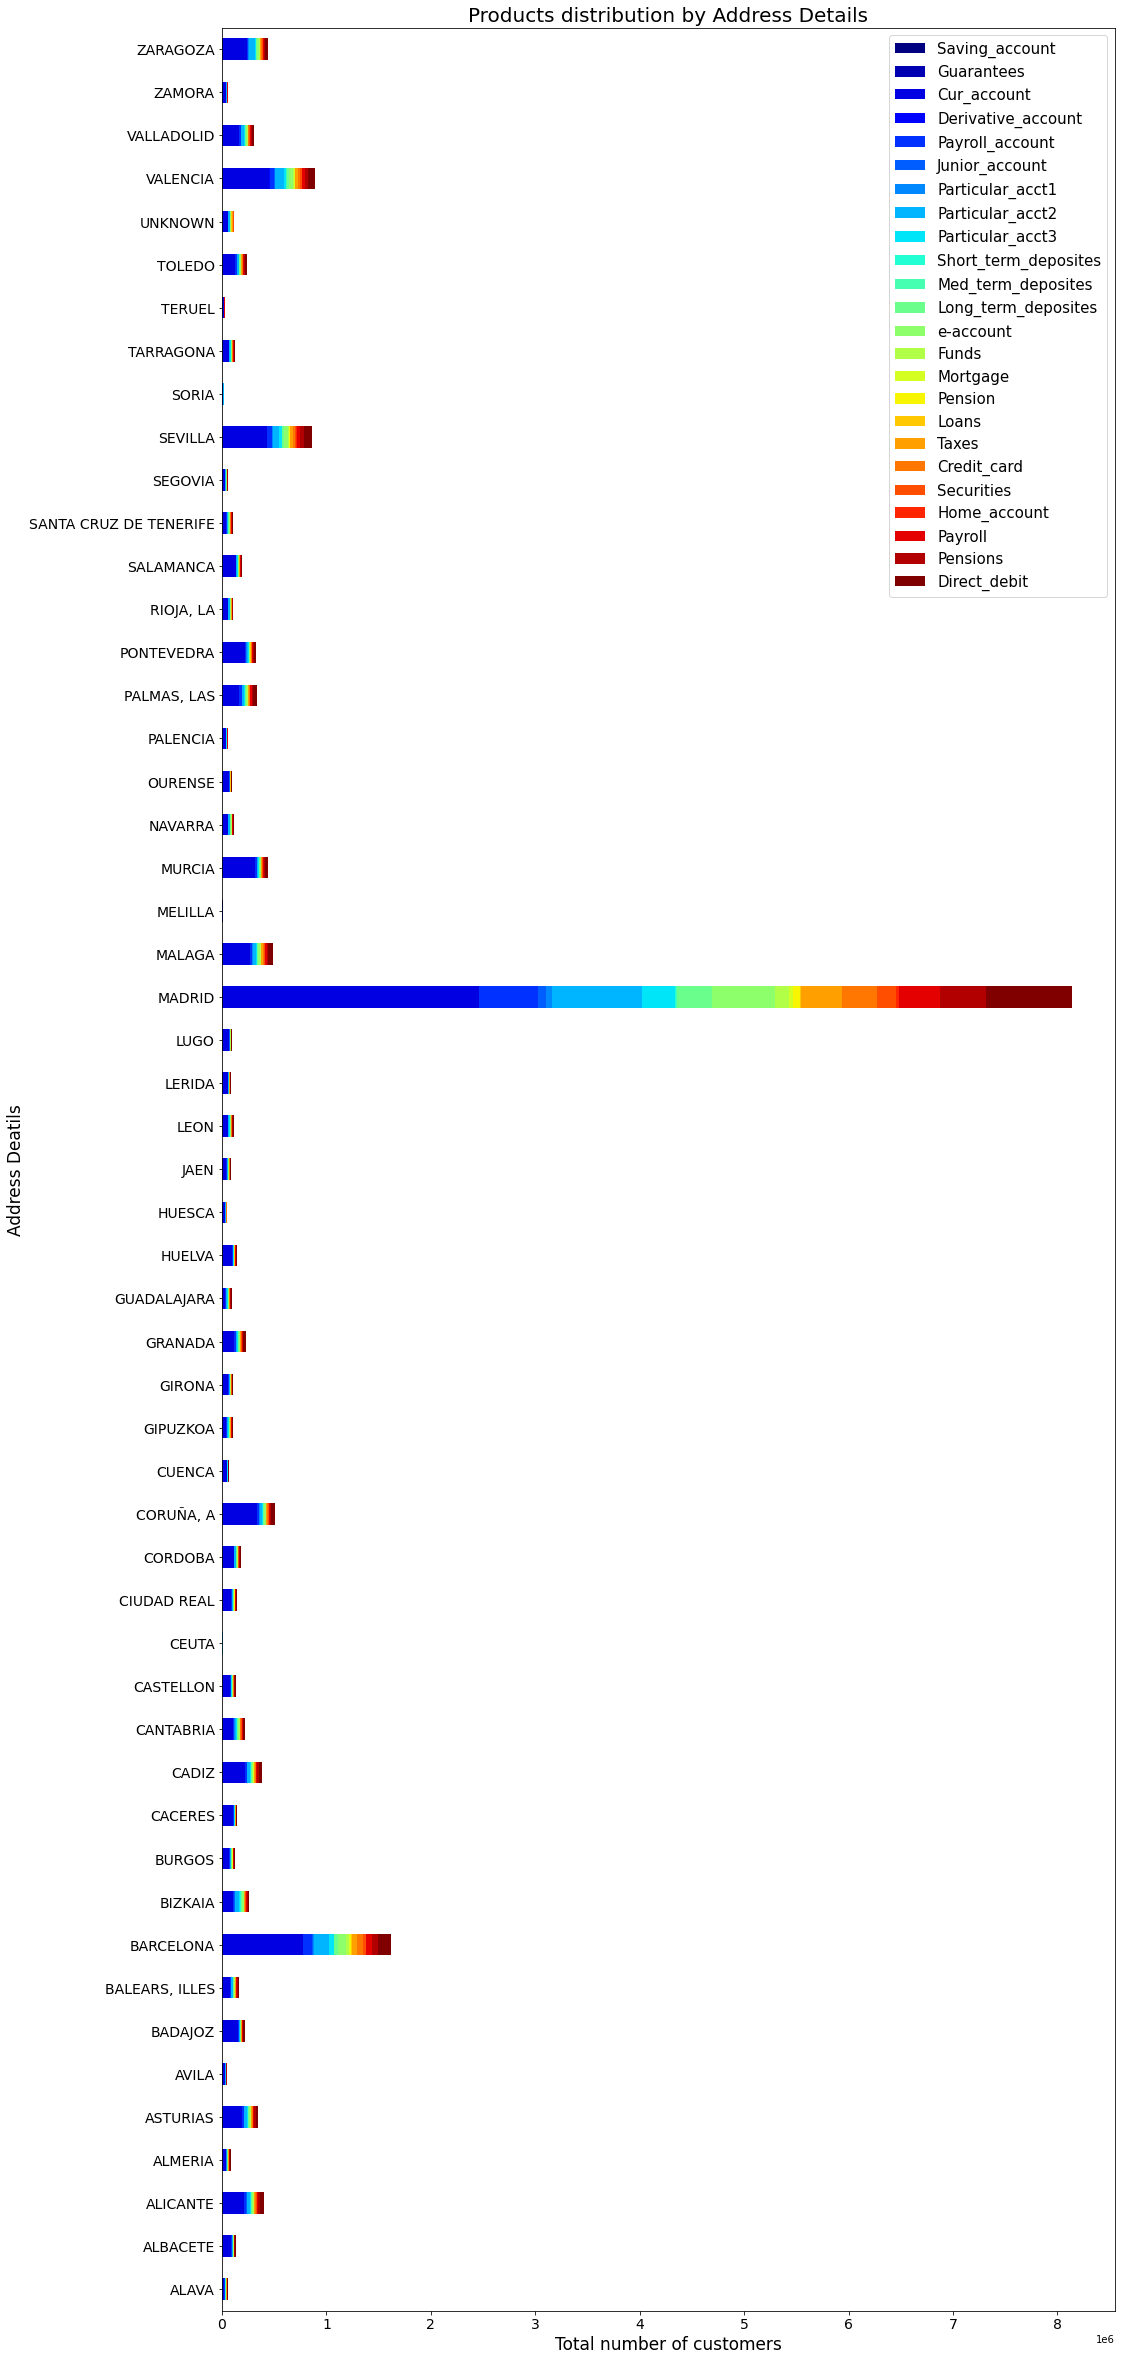

In [6]:
# Products distribution by Address_details
df_address.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,42], colormap='jet')
plt.title('Products distribution by Address Details', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Address Deatils', fontsize=17, color='black') 
plt.legend(prop={'size':15})
plt.savefig('Product Distribution by Address Details.png')

#### OBSERVATION

Customer from MADRID buy more products. The popularity of city from which the customer buy more product are as follows in their priority order: 1.Madrid, 2.Barcelona, 3.Valencia, 4.Sevilla and 5. Valencia. The most popular product irrespective from where customer belong is Current Account.

# COMPARISON WITH RESPECT TO NUMBER OF PRODUCTS OWNED BY CUSTOMER

## Total Number of Product owned by Customer

In [ ]:
#create total product
m17['tot_p'] = m17.loc[: ,"Saving_account": "Direct_debit"].sum(axis=1)
m17['tot_p'] = pd.to_numeric(m17['tot_p'], errors ='coerce')

/Users/gaurav/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/gaurav/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Number of Customers')

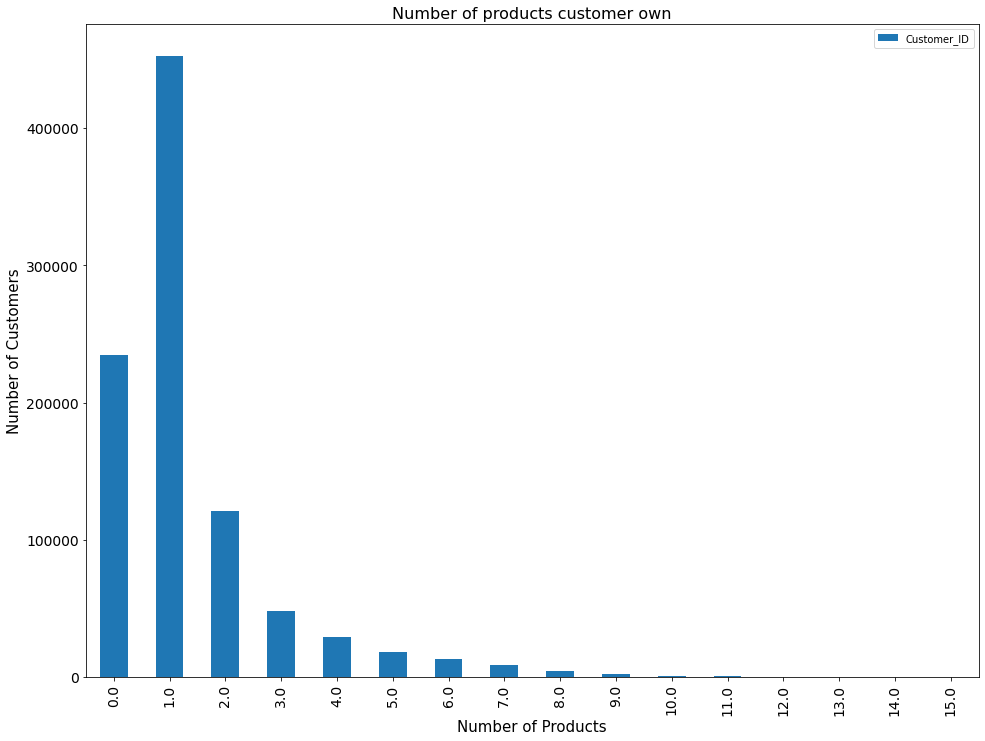

In [ ]:
#see how many products own of each customers
product_n_own = m17.loc[:, ['tot_p' ]].join(m17.loc[: ,"Customer_ID"])
product_n_own = product_n_own.groupby(['tot_p']).count()
product_n_own.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12])
plt.title('Number of products customer own', fontsize = 16)
plt.xlabel('Number of Products',fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)

#### OBSERVATION

Majority of Customer own only one product or not even a single product.

## Among customers most popular products

Text(0, 0.5, 'times of occurences')

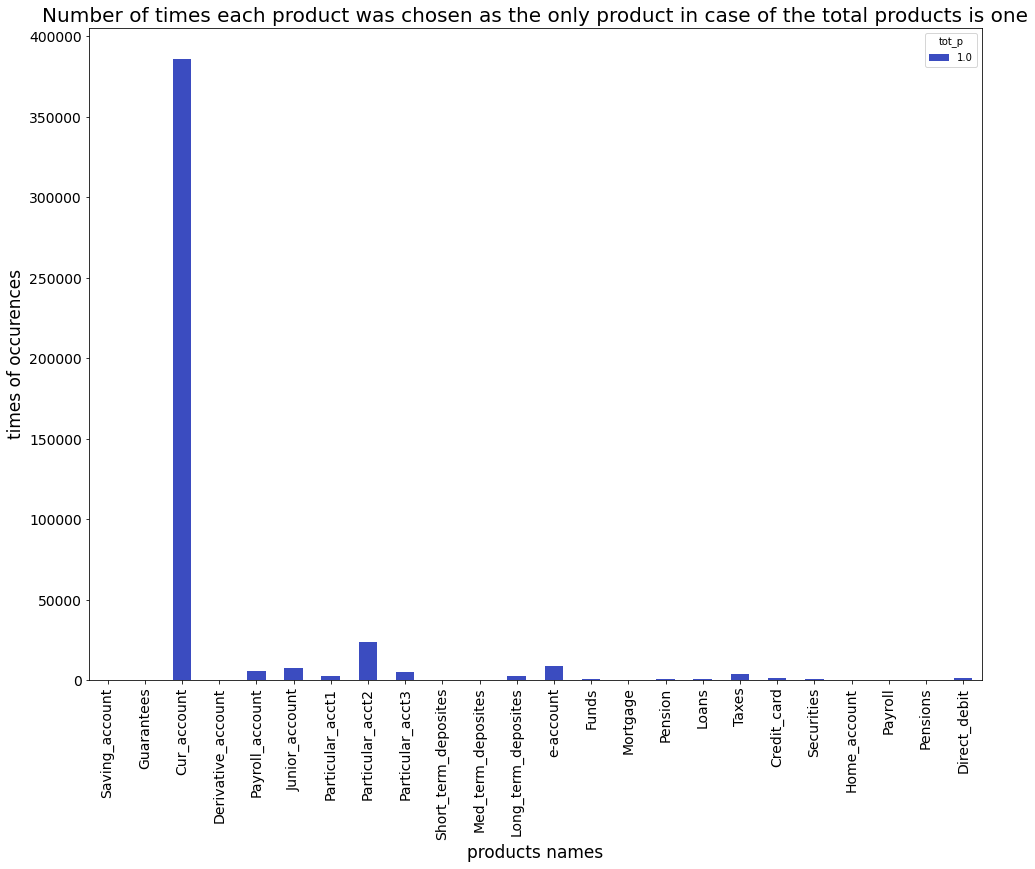

In [ ]:
#see which product is the popular one when customers only own one product
p1 = m17[m17["tot_p"]==1]  # cases where the total products is one
p1 = p1.loc[:, ["tot_p"]].join(p1.loc[:, "Saving_account": "Direct_debit"]) 
p1= p1.groupby("tot_p").agg("sum")
p1= p1.T
p1.plot(kind='bar', stacked=True, fontsize=14, figsize=[16,12], colormap='coolwarm')
plt.title('Number of times each product was chosen as the only product in case of the total products is one', fontsize=20) 
plt.xlabel('products names', fontsize=17, color='black') 
plt.ylabel('times of occurences', fontsize=17, color='black')

Text(0, 0.5, 'Times of occurences')

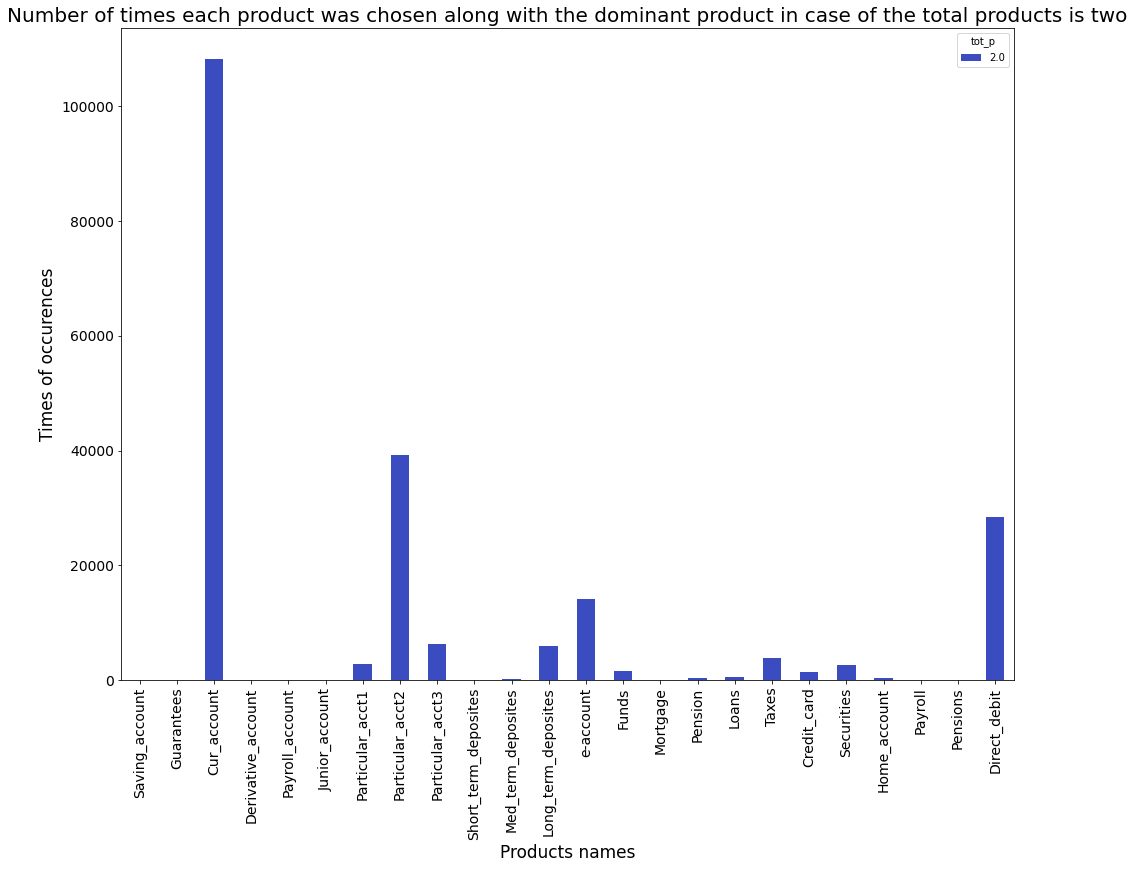

In [ ]:
# see which product is second product that the customer own when they also own the dominated product, when they own two product
p2 = m17[m17["tot_p"]==2]
p2 = p2[p2['Cur_account']==1]
p2 = p2.loc[:, ["tot_p"]].join(p2.loc[:, "Saving_account": "Direct_debit"]) 
p2= p2.groupby("tot_p").agg("sum")
p2= p2.T
p2.plot(kind='bar', stacked=True, fontsize=14, figsize=[16,12], colormap='coolwarm')
plt.title('Number of times each product was chosen along with the dominant product in case of the total products is two', fontsize=20) 
plt.xlabel('Products names', fontsize=17, color='black') 
plt.ylabel('Times of occurences', fontsize=17, color='black')

Text(0, 0.5, 'Times of occurences')

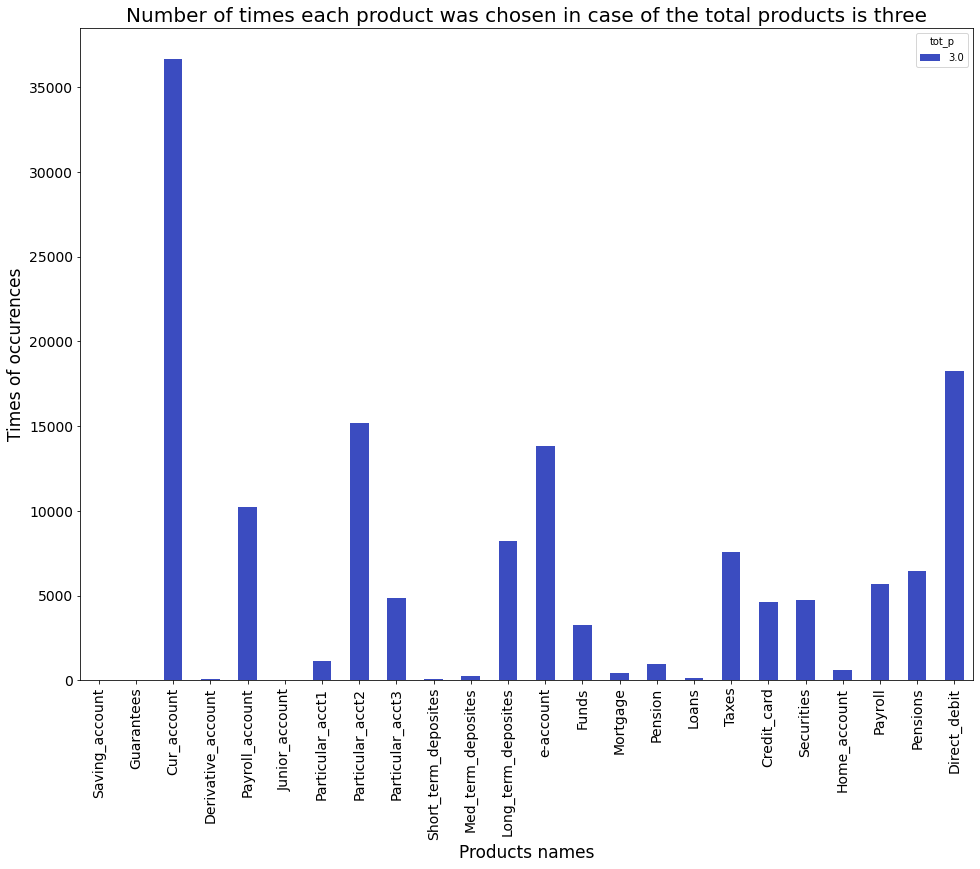

In [ ]:
#see which products is the popular one when customers only own one product
p3 = m17[m17["tot_p"]==3]
p3 = p3.loc[:, ["tot_p"]].join(p3.loc[:, "Saving_account": "Direct_debit"]) 
p3= p3.groupby("tot_p").agg("sum")
p3= p3.T
p3.plot(kind='bar', stacked=True, fontsize=14, figsize=[16,12], colormap='coolwarm')
plt.title('Number of times each product was chosen in case of the total products is three', fontsize=20) 
plt.xlabel('Products names', fontsize=17, color='black') 
plt.ylabel('Times of occurences', fontsize=17, color='black')

#### OBSERVATION

Final Conclusion After Analzing above three Graph:
    - Among those customers that own only one product, mojority of them own Current Account.
    - Among those customers that own Current Account + one more product, Particular Account_2 is the next best choice for customer, followed by Direct Debit.
    - Among those customers that own Current Account + two more product, Direct Debit is the other best choice, followed by E-Account, payroll Account and Long Term Deposit Account

## Distribution of Average Income according to Total Products

In [ ]:
df_inc = train.loc[:, ['Gross_household_income']].join(train.loc[:, "Saving_account": "tot_products"])

In [ ]:
df_inc = df_inc.dropna(axis=0)

In [ ]:
df_inc = df_inc.groupby('tot_products').agg('mean')
df_b = df_inc.loc[:, ['Gross_household_income']]

In [ ]:
df_b.head()

,Gross_household_income
tot_products,
0.0,130914.302600
1.0,117495.420022
2.0,135549.178615
3.0,143311.993353
4.0,145871.805196


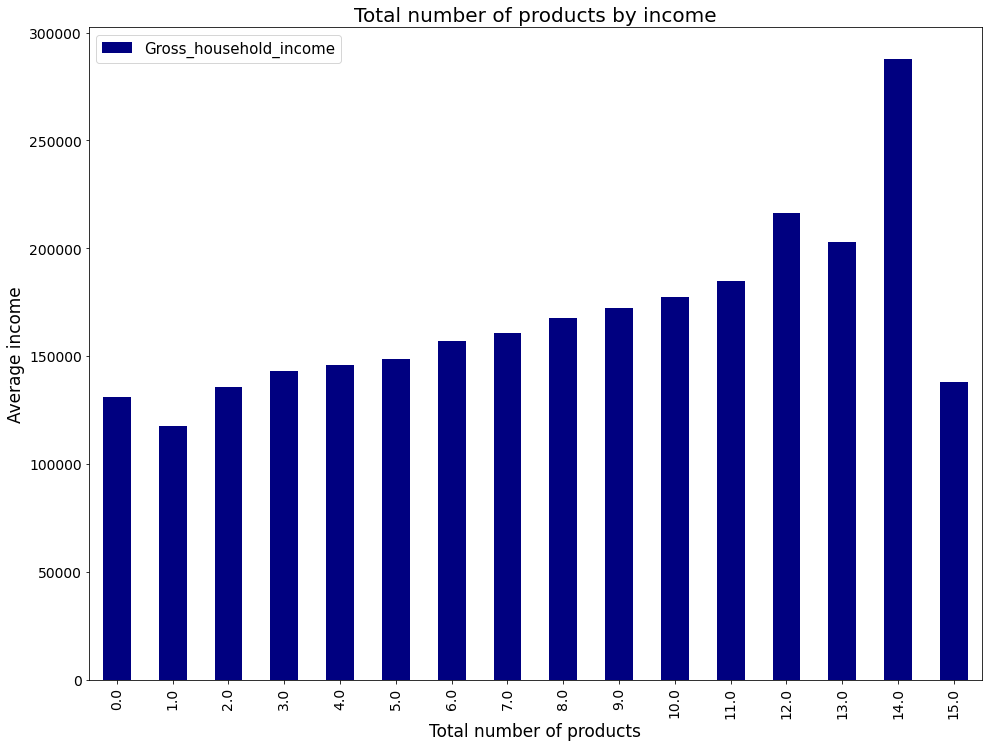

In [ ]:
df_a = df_b["Gross_household_income"]
# Total number of products by income
df_a.plot(kind='bar', fontsize=14, figsize=[16,12], colormap='jet')
plt.title('Total number of products by income', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Average income', fontsize=17, color='black') 
plt.legend(prop={'size':15})

#### OBSERVATION

- Customer having more income buys more products.
- Average Income above 250K holds 14 number of products.

## Distribution of Average Customer Seniority according to Total Products

In [ ]:
df_snr = train.loc[:, ['Relnshp_Mnths']].join(train.loc[:, "Saving_account": "tot_products"])

In [ ]:
df_snr = df_snr.dropna(axis=0)

In [ ]:
df_snr = df_snr.groupby('tot_products').agg('mean')
df_b = df_snr.loc[:, ['Relnshp_Mnths']]

In [ ]:
df_b.head()

,Relnshp_Mnths
tot_products,
0,81.935756
1,58.557838
2,103.312329
3,114.636917
4,116.329776


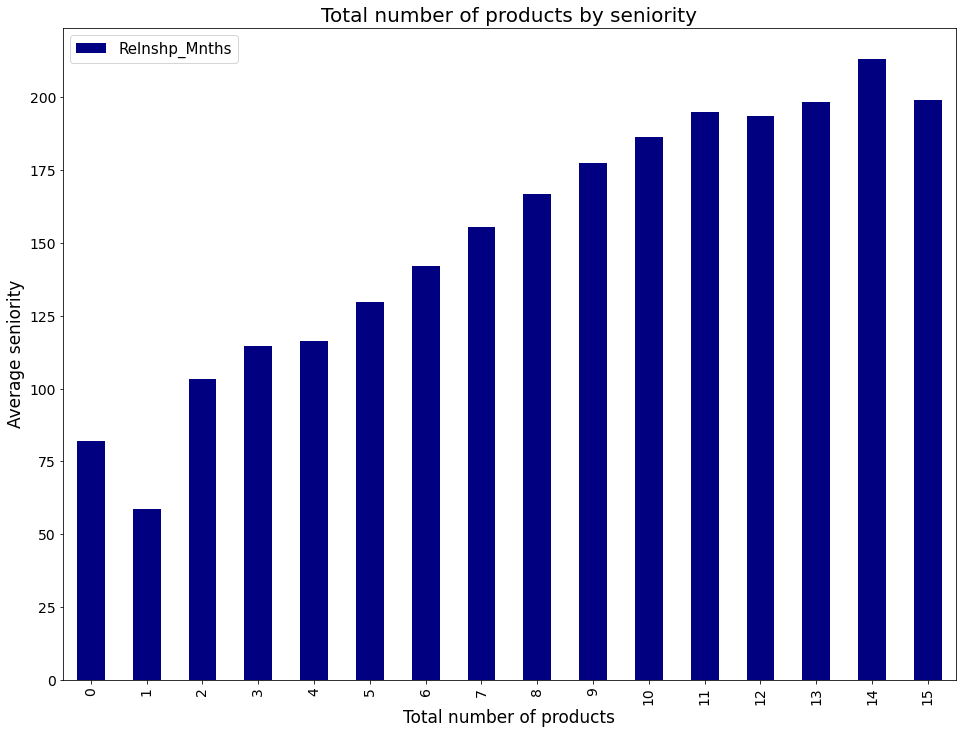

In [ ]:
df_a = df_b["Relnshp_Mnths"]
# Total number of products by income
df_a.plot(kind='bar', fontsize=14, figsize=[16,12], colormap='jet')
plt.title('Total number of products by seniority', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Average seniority', fontsize=17, color='black') 
plt.legend(prop={'size':15})

#### OBSERVATION

Customer with more seniority tends to buy more products

## Total Number of Product bought according to Segment

Text(0, 0.5, 'Number of customers')

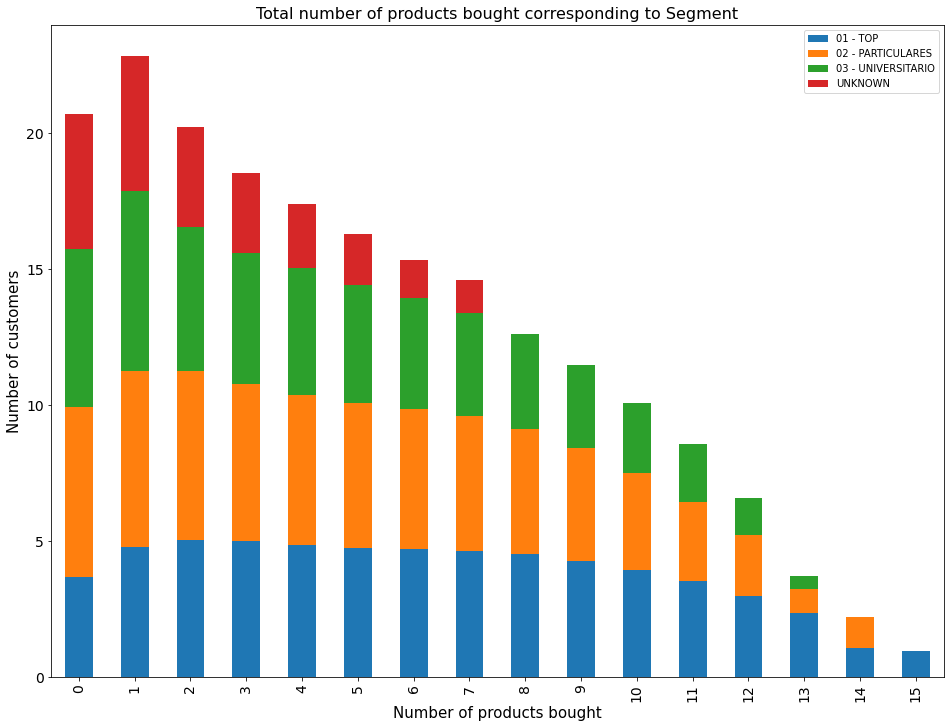

In [8]:
# total number of products bought  vs  Segment   

# creating a seperate dataframe for Segment and total_prod columns
prod_vs_segment=train.loc[:,['Segment']].join(train.loc[:,['total_prod']])

# initializing a dictionary to count the different segment values with respect to the number of products bought
products_wise_segment_count={}
segment_values=['01 - TOP','02 - PARTICULARES','03 - UNIVERSITARIO','UNKNOWN']
for i in range(16):
    products_wise_segment_count[i]={}
    for j in segment_values:
        products_wise_segment_count[i][j]=0

rows=len(prod_vs_segment)
for i in range(rows):
    products_wise_segment_count[prod_vs_segment.total_prod.loc[i]][prod_vs_segment.Segment.loc[i]]+=1

#c onverting the dictionary to a dataframe
prod_vs_segment_df=pd.DataFrame(products_wise_segment_count)
prod_vs_segment_df=prod_vs_segment_df.T

prod_vs_segment_df['01 - TOP']=np.log10(prod_vs_segment_df['01 - TOP'])
prod_vs_segment_df['02 - PARTICULARES']=np.log10(prod_vs_segment_df['02 - PARTICULARES'])
prod_vs_segment_df['03 - UNIVERSITARIO']=np.log10(prod_vs_segment_df['03 - UNIVERSITARIO'])
prod_vs_segment_df['UNKNOWN']=np.log10(prod_vs_segment_df['UNKNOWN'])

prod_vs_segment_df['01 - TOP'].loc[prod_vs_segment_df['01 - TOP']==-np.inf]=0
prod_vs_segment_df['02 - PARTICULARES'].loc[prod_vs_segment_df['02 - PARTICULARES']==-np.inf]=0
prod_vs_segment_df['03 - UNIVERSITARIO'].loc[prod_vs_segment_df['03 - UNIVERSITARIO']==-np.inf]=0
prod_vs_segment_df['UNKNOWN'].loc[prod_vs_segment_df['UNKNOWN']==-np.inf]=0

# plotting the values
prod_vs_segment_df.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12])
plt.title('Total number of products bought corresponding to Segment', fontsize = 16)
plt.xlabel('Number of products bought',fontsize = 15)
plt.ylabel('Number of customers', fontsize = 15)

#### OBSERVATION

VIP Customer tend to buy more number of products than other customer segment.

## Total Number of Product Bought according to Major Cities

Text(0, 0.5, 'Number of customers')

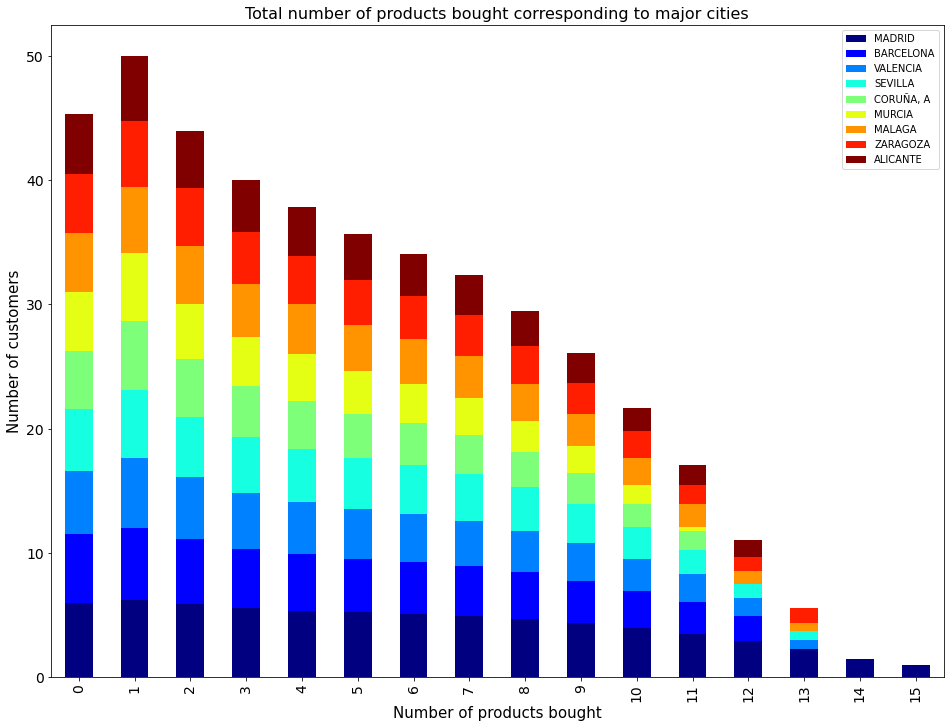

In [9]:
# total number of products bought  vs  cities with number of customers more than 3,00,000

# creating a seperate dataframe for cities and total_prod columns
prods_vs_cities=train.loc[:,['Address_detail','total_prod']]

# major cities are the cities which constitute atleast 3,00,000 customers each from the training data
major_cities=['MADRID','BARCELONA','VALENCIA','SEVILLA','CORUÑA, A','MURCIA','MALAGA','ZARAGOZA','ALICANTE']

# initializing a dictionary to count the number of times a particular city name appears with respect to the 
# total number of products bought
prods_wise_cities_count={}
for i in range(16):
    prods_wise_cities_count[i]={}
    for j in major_cities:
        prods_wise_cities_count[i][j]=0

rows=len(prods_vs_cities)       
for i in range(rows):
    current_city=prods_vs_cities.Address_detail.loc[i]
    if current_city in major_cities:
        prods_wise_cities_count[prods_vs_cities.total_prod.loc[i]][current_city]+=1

# converting the dictionary into a dataframe
major_cities_vs_prods_df=pd.DataFrame(prods_wise_cities_count)
major_cities_vs_prods_df=major_cities_vs_prods_df.T

for i in major_cities:
  major_cities_vs_prods_df[i]=np.log10(major_cities_vs_prods_df[i])
  major_cities_vs_prods_df[i].loc[major_cities_vs_prods_df[i]==-np.inf]=0

# plotting the values
major_cities_vs_prods_df.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12],colormap='jet')
plt.title('Total number of products bought corresponding to major cities', fontsize = 16)
plt.xlabel('Number of products bought',fontsize = 15)
plt.ylabel('Number of customers', fontsize = 15)

#### OBSERVATION

Majorly customer from Madrid, Barcelona, Valencia and Sevilla are buying more products.

## Distribution of Payroll and Pensions product according to number of products bought

Text(0, 0.5, 'Number of customers')

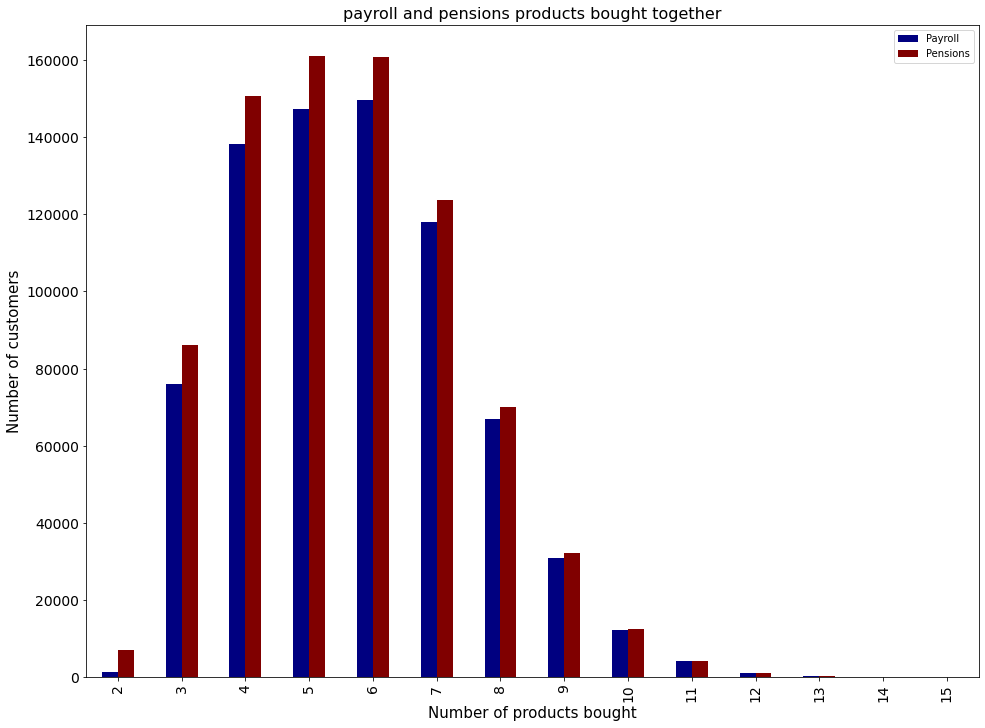

In [ ]:
# checking for a relationship between the number of times payroll and pensions products were bought together
# with respect to the total number of products bought

# creating a new dataframe for the columns payroll, pensions and total_prod
prods_vs_payroll_pensions=train.loc[:,['Payroll','Pensions','total_prod']]

# we will be comparing the number of times payroll and pensions were bought together
# for that we will need customers who have purchased atleast two products


# creating a dictionary to count the number of times each product was bought
payroll_pensions_compare={}
for i in range(2,16):
    payroll_pensions_compare[i]={'Payroll':0,'Pensions':0}

rows=len(prods_vs_payroll_pensions)
for i in range(rows):
    products=prods_vs_payroll_pensions.total_prod.loc[i]
    if products>1:
        payroll_status=prods_vs_payroll_pensions.Payroll.loc[i]
        pensions_status=prods_vs_payroll_pensions.Pensions.loc[i]
        if payroll_status==1:
            payroll_pensions_compare[products]['Payroll']+=1
        if pensions_status==1:
            payroll_pensions_compare[products]['Pensions']+=1

# plotting values
pp_df=pd.DataFrame(payroll_pensions_compare).T
pp_df.plot(kind='bar' , stacked=False, fontsize=14, figsize=[16,12],colormap='jet')
plt.title('payroll and pensions products bought together', fontsize = 16)
plt.xlabel('Number of products bought',fontsize = 15)
plt.ylabel('Number of customers', fontsize = 15)

#### OBSERVATION

Customers who are buying Pension are also buying Payroll product.

## Different age groups to which customers belong with respect to the number of products bought

Text(0, 0.5, 'Number of products bought')

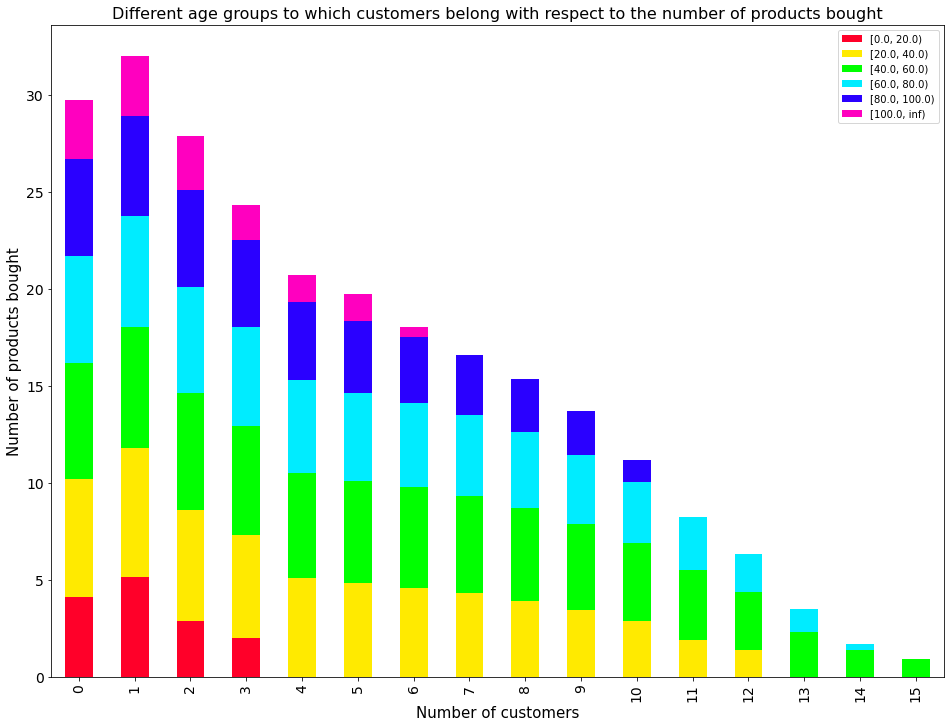

In [11]:
# groups of ages vs total number of products bought

# isolating age and total_prod from the actual dataset
age_df=train.loc[:,['Age']]
total_prods_df=train.loc[:,['total_prod']]

# creating intervals for age values in Age column
age_divided=pd.cut(age_df['Age'],[0,20,40,60,80,100, np.inf], right=False)
age_divided=pd.DataFrame(age_divided)

# joining the two dataframes and creating one dataframe
age_vs_prods=pd.concat([age_divided,total_prods_df],axis=1)

# creating a dictionary to count the age intervals with respect to total_prod
age_vs_prods_count={}
for i in range(16):
    age_vs_prods_count[i]={'[0.0, 20.0)':0,'[20.0, 40.0)':0,'[40.0, 60.0)':0,'[60.0, 80.0)':0,'[80.0, 100.0)':0,'[100.0, inf)':0}

rows=len(age_vs_prods)
for i in range(rows):
    age_vs_prods_count[age_vs_prods.total_prod.loc[i]][str(age_vs_prods.Age.loc[i])]+=1

# converting the dictionary obtained finally into a dataframe
age_vs_prods_final=pd.DataFrame(age_vs_prods_count)
age_vs_prods_final=age_vs_prods_final.T

age_intervals=list(age_vs_prods_count[0].keys())

for i in age_intervals:
  age_vs_prods_final[i]=np.log10(age_vs_prods_final[i])
  age_vs_prods_final[i].loc[age_vs_prods_final[i]==-np.inf]=0


# plotting the graph
age_vs_prods_final.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12],colormap='gist_rainbow')
plt.title('Different age groups to which customers belong with respect to the number of products bought', fontsize = 16)
plt.xlabel('Number of customers',fontsize = 15)
plt.ylabel('Number of products bought', fontsize = 15)

#### OBSERVATION

Customer lying in the age group between 20-60 are majorly buying more products. However, customer buying more than 10 products lie in the age group of 40-60.

# Instead looking at the relationship between products and customers, we also did some investigation on how does the product sales over time. 

## Total number of current accounts bought month wise

Text(0, 0.5, 'Number of current accounts bought')

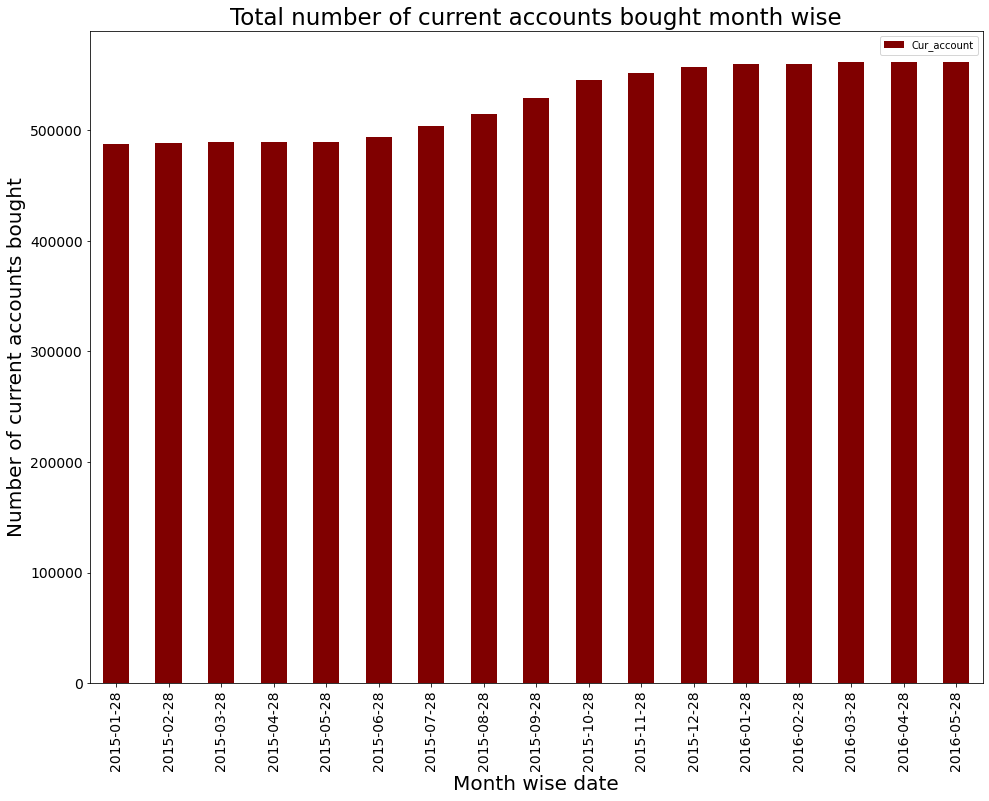

In [ ]:
# total number of current accounts bought each month

# creating a dataframe with columns Month_status_date and Cur_account
month_status_date_vs_current_account=train.loc[:,['Month_status_date','Cur_account']]

# grouping the data by Month_status_date or month wise date and calculating the 
# total number of current accounts bought in that month
month_wise_number_of_current_accounts_bought=month_status_date_vs_current_account.groupby(['Month_status_date']).sum()

month_wise_number_of_current_accounts_bought.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12],color='maroon')
plt.title('Total number of current accounts bought month wise', fontsize = 23)
plt.xlabel('Month wise date',fontsize = 20)
plt.ylabel('Number of current accounts bought', fontsize = 20)


## Total number of credit card bought month wise

Text(0, 0.5, 'Number of credit cards bought')

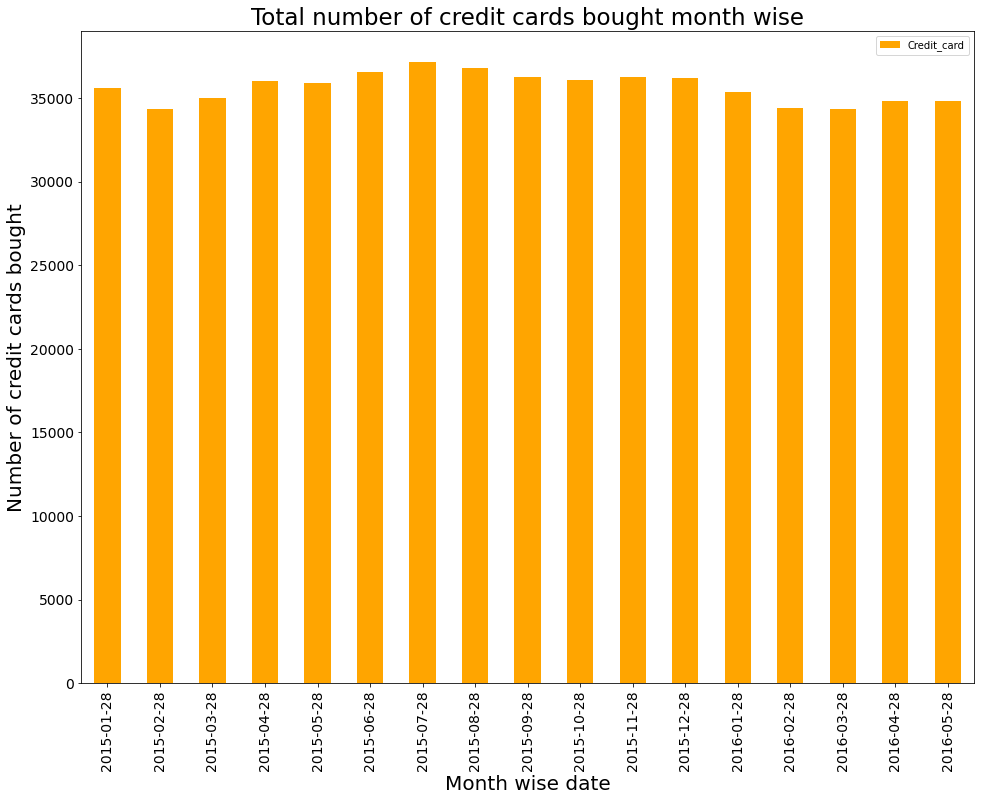

In [ ]:
# total number of credit cards bought each month

# creating a dataframe with columns Month_status_date and Credit_card
month_status_date_vs_credit_card=train.loc[:,['Month_status_date','Credit_card']]

# grouping the data by Month_status_date or month wise date and calculating the 
# total number of credit cards bought in that month
month_wise_number_of_credit_cards_bought=month_status_date_vs_credit_card.groupby(['Month_status_date']).sum()

month_wise_number_of_credit_cards_bought.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12],color='orange')
plt.title('Total number of credit cards bought month wise', fontsize = 23)
plt.xlabel('Month wise date',fontsize = 20)
plt.ylabel('Number of credit cards bought', fontsize = 20)


## Total number of direct debit product bought month wise

Text(0, 0.5, 'Number of direct debit products bought')

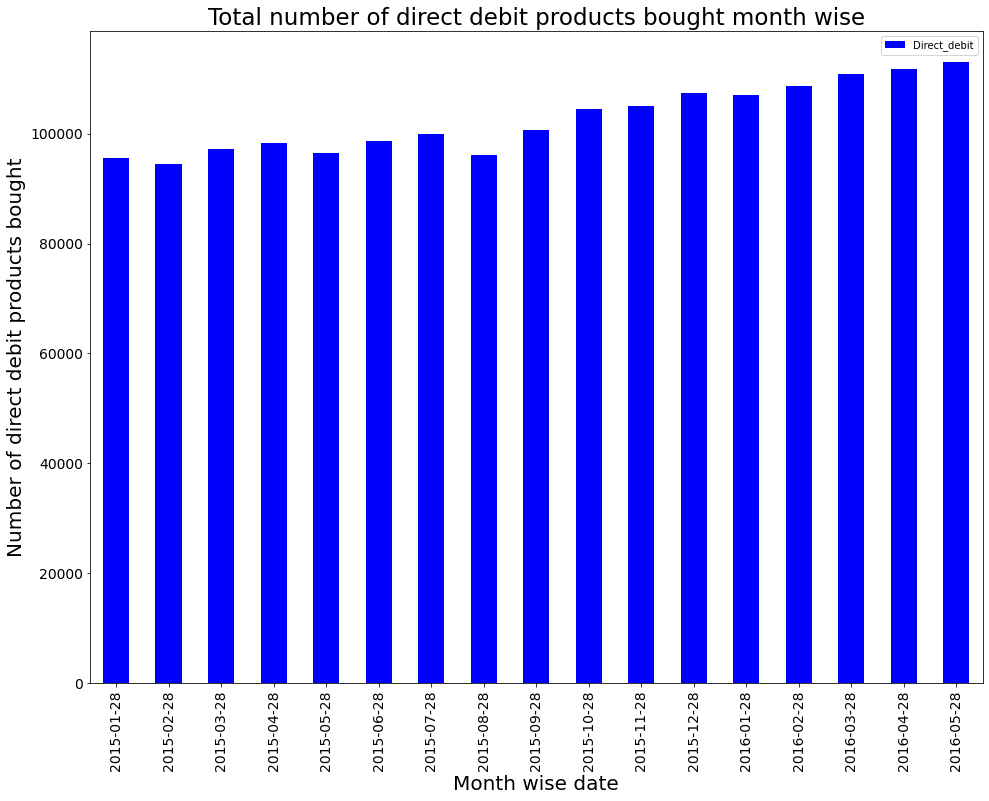

In [ ]:
# total number of direct debit products bought each month

# creating a dataframe with columns Month_status_date and Direct_debit
month_status_date_vs_direct_debit=train.loc[:,['Month_status_date','Direct_debit']]

# grouping the data by Month_status_date or month wise date and calculating the 
# total number of direct debit products bought in that month
month_wise_number_of_direct_debits_bought=month_status_date_vs_direct_debit.groupby(['Month_status_date']).sum()

month_wise_number_of_direct_debits_bought.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12],color='blue')
plt.title('Total number of direct debit products bought month wise', fontsize = 23)
plt.xlabel('Month wise date',fontsize = 20)
plt.ylabel('Number of direct debit products bought', fontsize = 20)


## Total number of payroll products bought month wise

Text(0, 0.5, 'Number of payroll products bought')

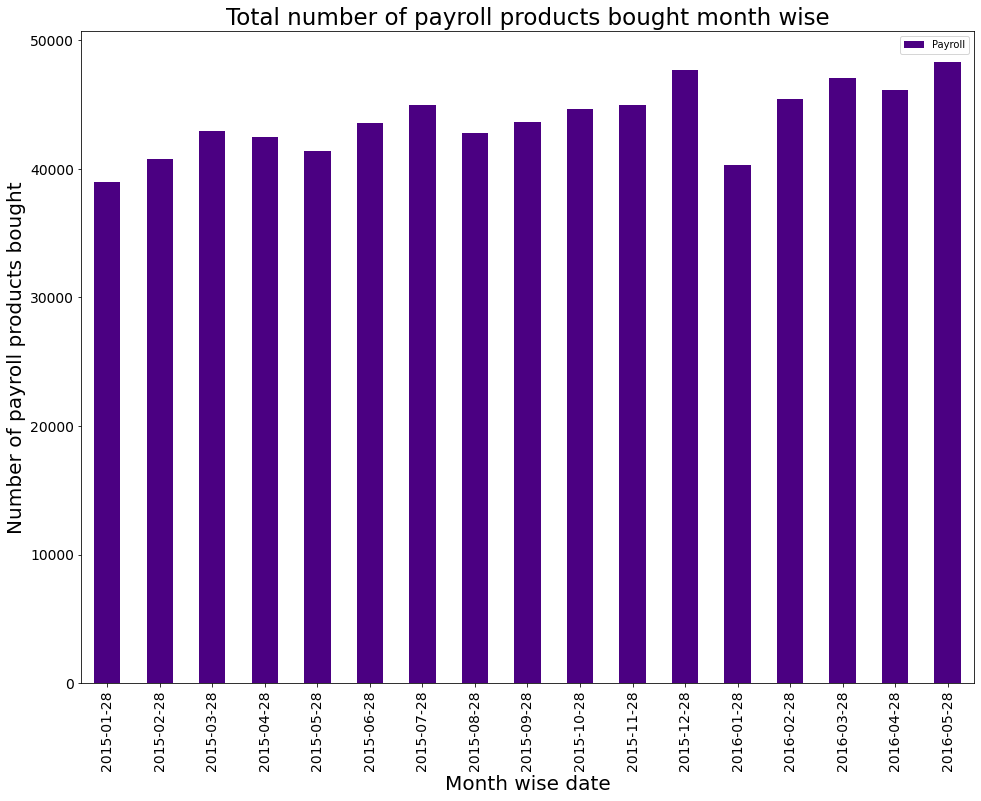

In [ ]:
# total number of payroll products bought each month

# creating a dataframe with columns Month_status_date and Payroll
month_status_date_vs_payroll=train.loc[:,['Month_status_date','Payroll']]

# grouping the data by Month_status_date or month wise date and calculating the 
# total number of payroll products bought in that month
month_wise_number_of_payrolls_bought=month_status_date_vs_payroll.groupby(['Month_status_date']).sum()

month_wise_number_of_payrolls_bought.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12],color='indigo')
plt.title('Total number of payroll products bought month wise', fontsize = 23)
plt.xlabel('Month wise date',fontsize = 20)
plt.ylabel('Number of payroll products bought', fontsize = 20)


## Total number of pension products bought month wise

Text(0, 0.5, 'Number of pension products bought')

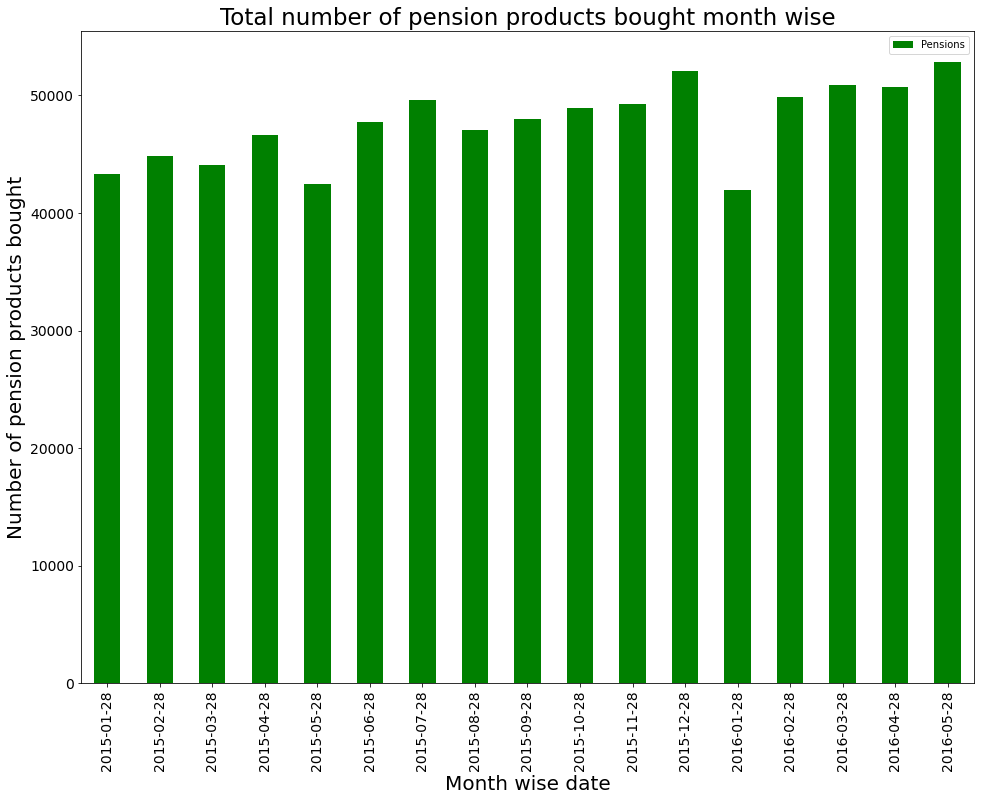

In [ ]:
# total number of pension products bought each month

# creating a dataframe with columns Month_status_date and Pensions
month_status_date_vs_pensions=train.loc[:,['Month_status_date','Pensions']]

# grouping the data by Month_status_date or month wise date and calculating the 
# total number of pension products bought in that month
month_wise_number_of_pensions_bought=month_status_date_vs_pensions.groupby(['Month_status_date']).sum()

month_wise_number_of_pensions_bought.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12],color='green')
plt.title('Total number of pension products bought month wise', fontsize = 23)
plt.xlabel('Month wise date',fontsize = 20)
plt.ylabel('Number of pension products bought', fontsize = 20)


## Total number of short term deposit products bought month wise

Text(0, 0.5, 'Number of short term deposit products bought')

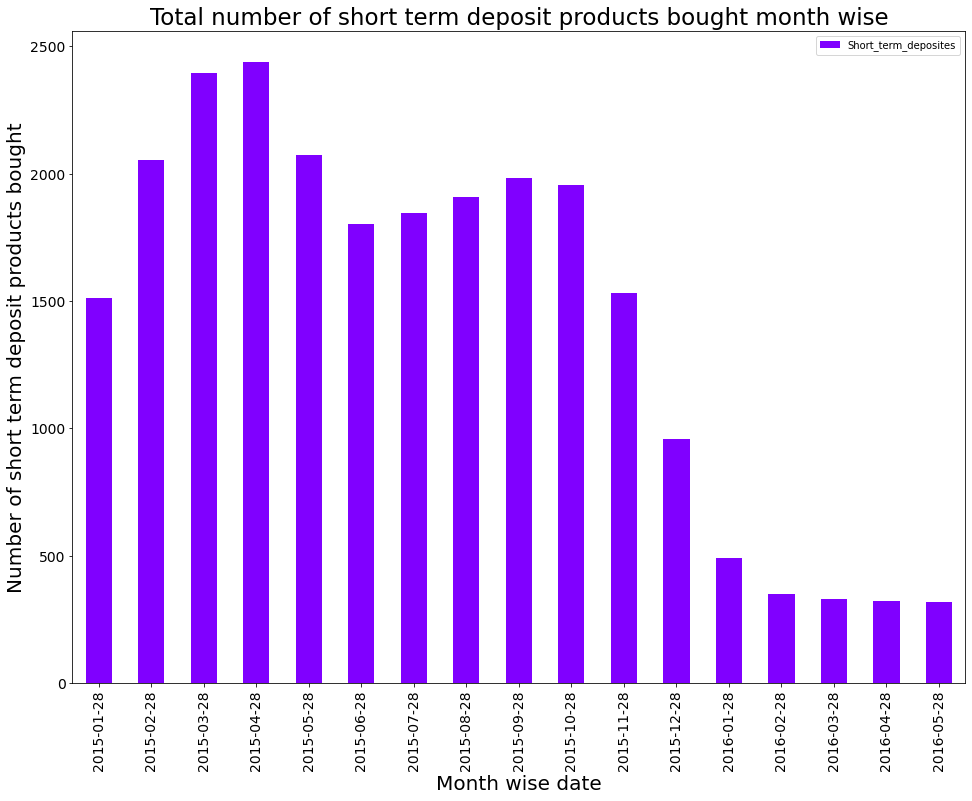

In [ ]:
# total number of short term deposit products bought each month

# creating a dataframe with columns Month_status_date and Short_term_deposites
month_status_date_vs_short_term_deposits=train.loc[:,['Month_status_date','Short_term_deposites']]

# grouping the data by Month_status_date or month wise date and calculating the 
# total number of short term deposit products bought in that month
month_wise_number_of_short_term_deposits_bought=month_status_date_vs_short_term_deposits.groupby(['Month_status_date']).sum()

month_wise_number_of_short_term_deposits_bought.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12],colormap='rainbow')
plt.title('Total number of short term deposit products bought month wise', fontsize = 23)
plt.xlabel('Month wise date',fontsize = 20)
plt.ylabel('Number of short term deposit products bought', fontsize = 20)


# Total number of savings accounts bought month wise 

Text(0, 0.5, 'Number of savings accounts bought')

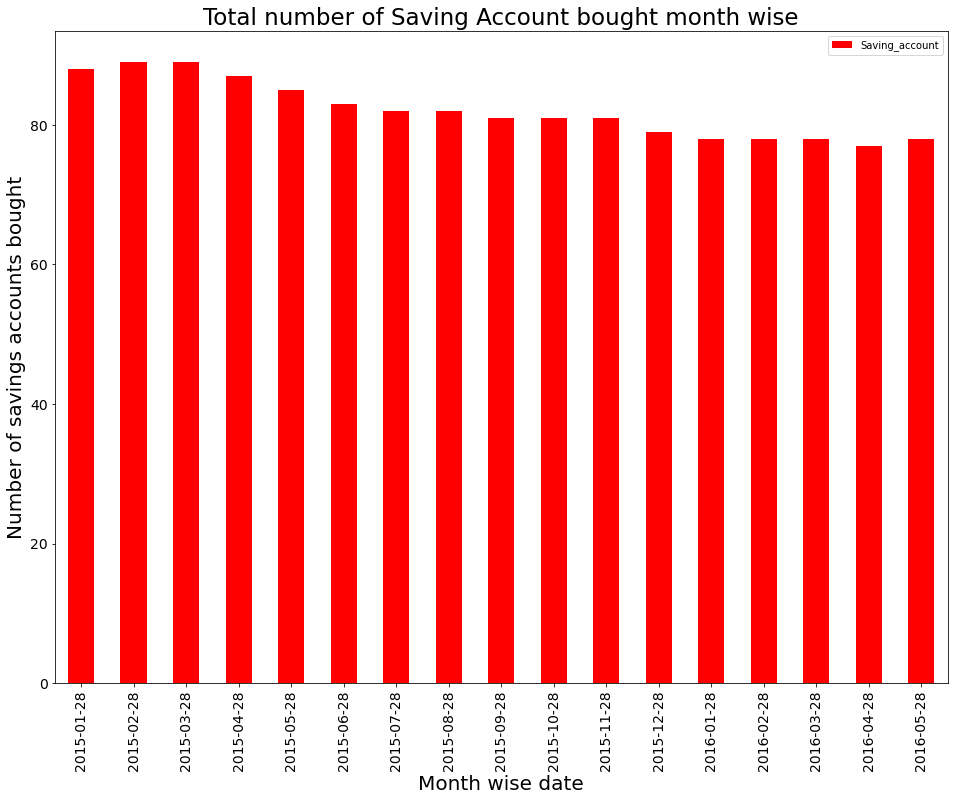

In [9]:
# total number of savings accounts bought each month

# creating a dataframe with columns Month_status_date and Saving_account
month_status_date_vs_savings=train.loc[:,['Month_status_date','Saving_account']]

# grouping the data by Month_status_date or month wise date and calculating the 
# total number of savings accounts bought in that month
month_wise_number_of_saving_accounts_bought=month_status_date_vs_savings.groupby(['Month_status_date']).sum()

month_wise_number_of_saving_accounts_bought.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12],color='red')
plt.title('Total number of Saving Account bought month wise', fontsize = 23)
plt.xlabel('Month wise date',fontsize = 20)
plt.ylabel('Number of savings accounts bought', fontsize = 20)

# Total number of guarantees products bought month wise

Text(0, 0.5, 'Number of guarantees products bought')

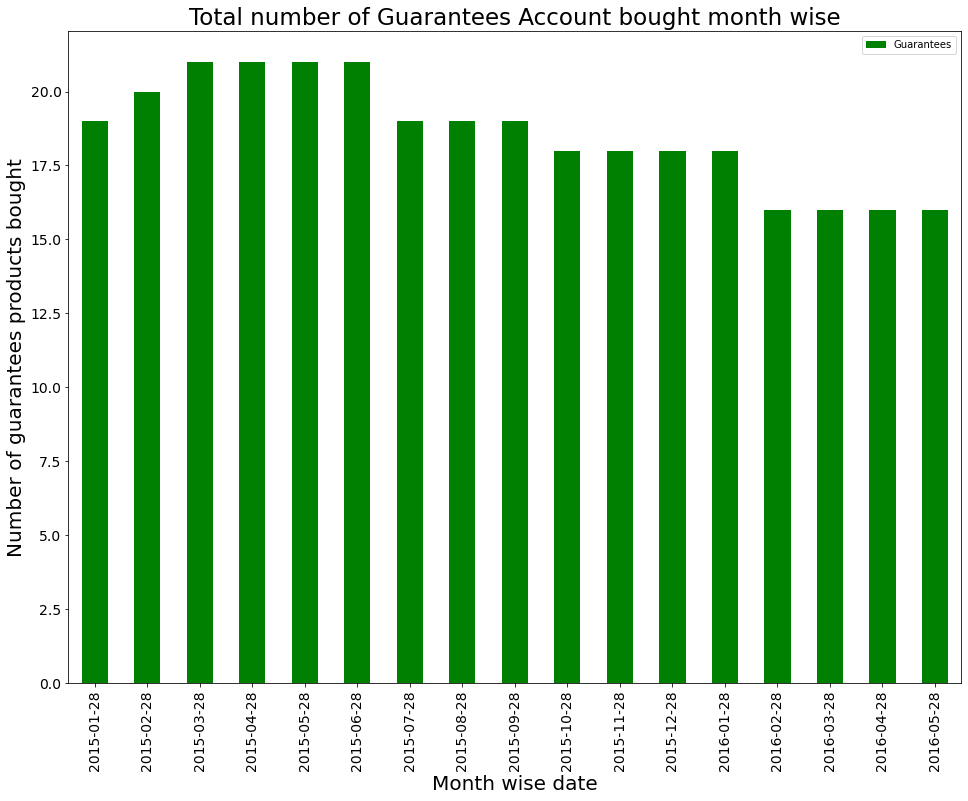

In [10]:
# total number of guarantees bought each month

# creating a dataframe with columns Month_status_date and Guaramtees
month_status_date_vs_guarantees=train.loc[:,['Month_status_date','Guarantees']]

# grouping the data by Month_status_date or month wise date and calculating the 
# total number of guarantees bought in that month
month_wise_number_of_guarantees_bought=month_status_date_vs_guarantees.groupby(['Month_status_date']).sum()

month_wise_number_of_guarantees_bought.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12],color='green')
plt.title('Total number of Guarantees Account bought month wise', fontsize = 23)
plt.xlabel('Month wise date',fontsize = 20)
plt.ylabel('Number of guarantees products bought', fontsize = 20)

# Total number of derivative accounts bought month wise

Text(0, 0.5, 'Number of derivative accounts bought')

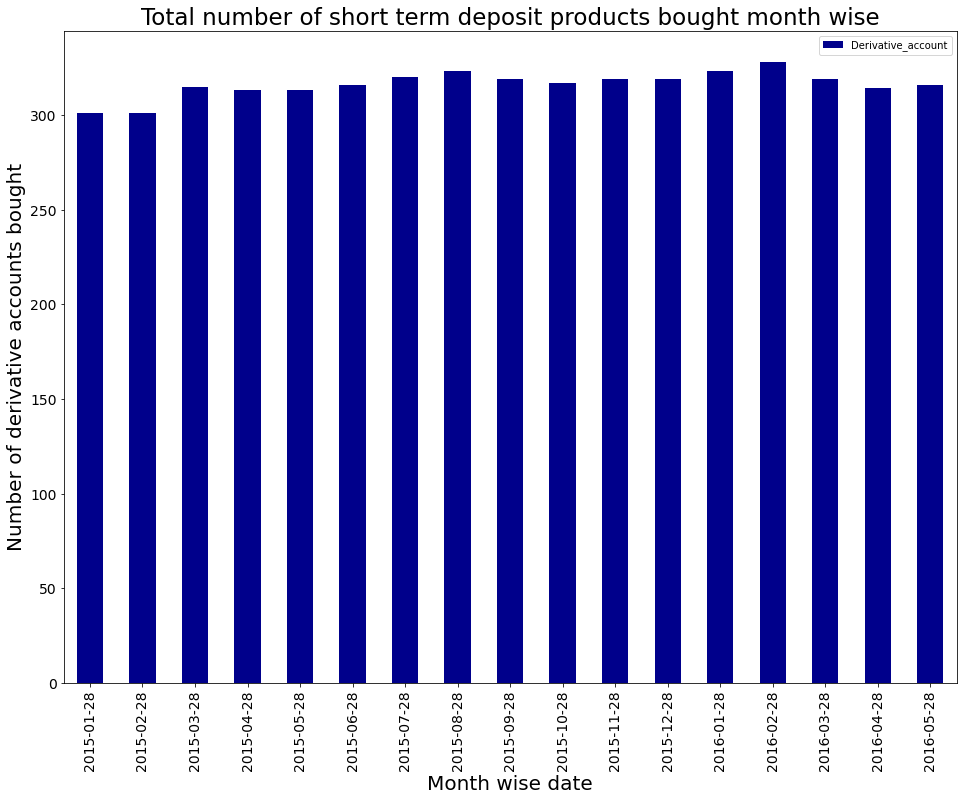

In [50]:
# total number of derivative accounts bought each month

# creating a dataframe with columns Month_status_date and Derivative_account
month_status_date_vs_derivative_accounts=train.loc[:,['Month_status_date','Derivative_account']]

# grouping the data by Month_status_date or month wise date and calculating the 
# total number of derivative accounts bought in that month
month_wise_number_of_derivative_accounts_bought=month_status_date_vs_derivative_accounts.groupby(['Month_status_date']).sum()

month_wise_number_of_derivative_accounts_bought.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12],color='darkblue')
plt.title('Total number of short term deposit products bought month wise', fontsize = 23)
plt.xlabel('Month wise date',fontsize = 20)
plt.ylabel('Number of derivative accounts bought', fontsize = 20)


# Total number of payroll accounts bought month wise

Text(0, 0.5, 'Number of payroll accounts bought')

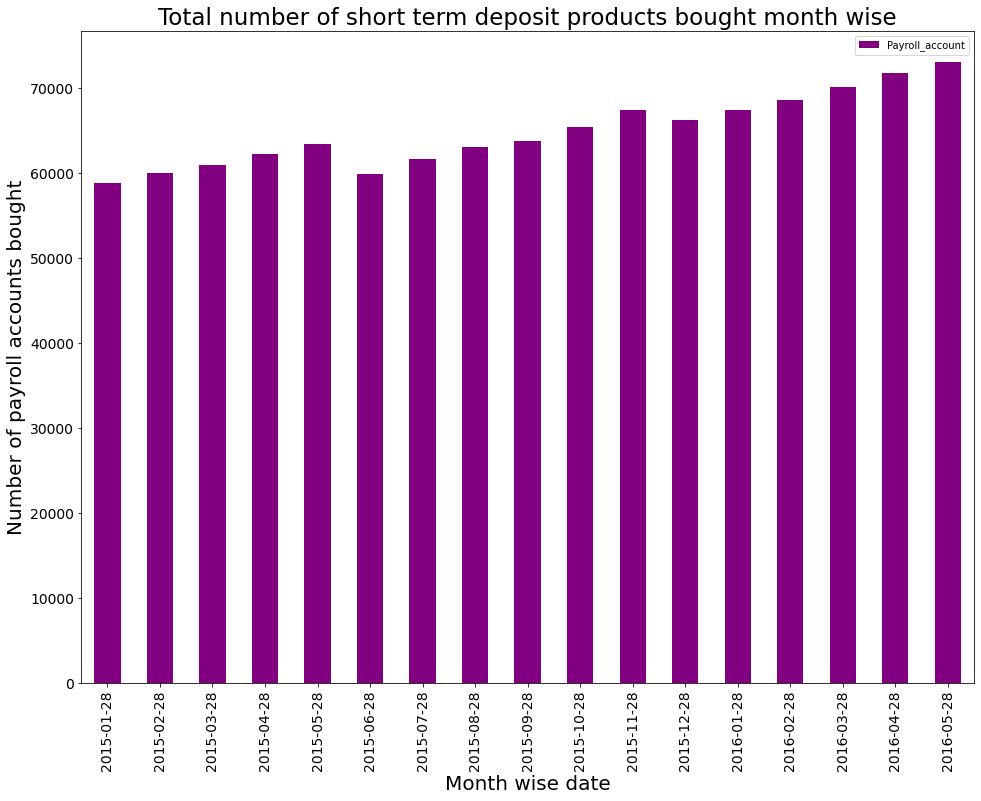

In [49]:
# total number of payroll accounts bought each month

# creating a dataframe with columns Month_status_date and Payroll_account
month_status_date_vs_payroll_accounts=train.loc[:,['Month_status_date','Payroll_account']]

# grouping the data by Month_status_date or month wise date and calculating the 
# total number of payroll accounts bought in that month
month_wise_number_of_payroll_accounts_bought=month_status_date_vs_payroll_accounts.groupby(['Month_status_date']).sum()

month_wise_number_of_payroll_accounts_bought.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12],color='purple')
plt.title('Total number of short term deposit products bought month wise', fontsize = 23)
plt.xlabel('Month wise date',fontsize = 20)
plt.ylabel('Number of payroll accounts bought', fontsize = 20)


# Total number of junior accounts bought month wise

Text(0, 0.5, 'Number of junior accounts bought')

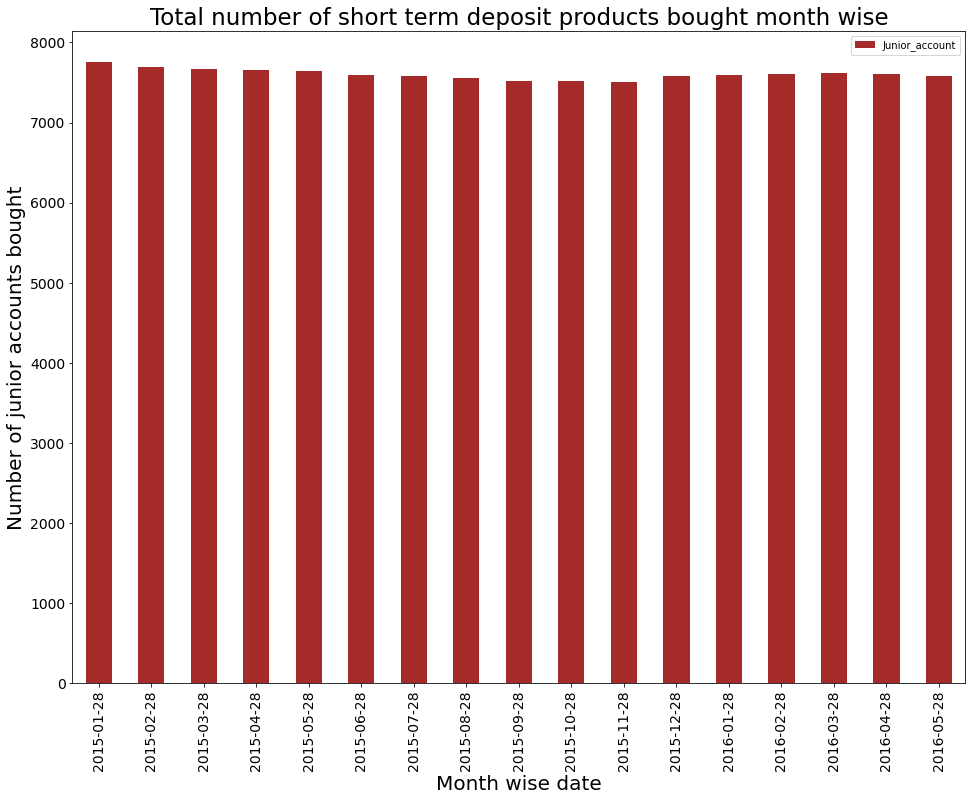

In [48]:
# total number of junior accounts bought each month

# creating a dataframe with columns Month_status_date and Junior_account
month_status_date_vs_junior_accounts=train.loc[:,['Month_status_date','Junior_account']]

# grouping the data by Month_status_date or month wise date and calculating the 
# total number of junior accounts bought in that month
month_wise_number_of_junior_accounts_bought=month_status_date_vs_junior_accounts.groupby(['Month_status_date']).sum()

month_wise_number_of_junior_accounts_bought.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12],color='brown')
plt.title('Total number of short term deposit products bought month wise', fontsize = 23)
plt.xlabel('Month wise date',fontsize = 20)
plt.ylabel('Number of junior accounts bought', fontsize = 20)


# Total number of particular account 1 products bought month wise

Text(0, 0.5, 'Number of particular account 1 products bought')

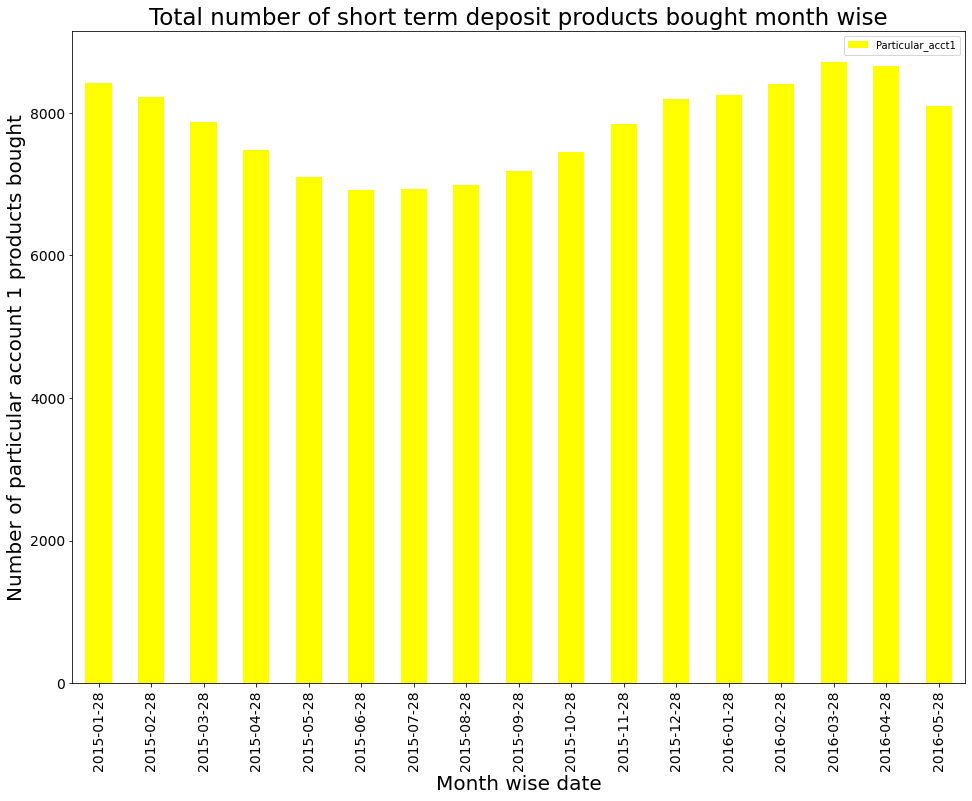

In [47]:
# total number of particular account 1 bought each month

# creating a dataframe with columns Month_status_date and Particular_acct1
month_status_date_vs_particular_accounts1=train.loc[:,['Month_status_date','Particular_acct1']]

# grouping the data by Month_status_date or month wise date and calculating the 
# total number of particular account 1 bought in that month
month_wise_number_of_particular_accounts1_bought=month_status_date_vs_particular_accounts1.groupby(['Month_status_date']).sum()

month_wise_number_of_particular_accounts1_bought.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12],color='yellow')
plt.title('Total number of short term deposit products bought month wise', fontsize = 23)
plt.xlabel('Month wise date',fontsize = 20)
plt.ylabel('Number of particular account 1 products bought', fontsize = 20)


# Total number of particular account 2 products bought month wise

Text(0, 0.5, 'Number of particular account 2 products bought')

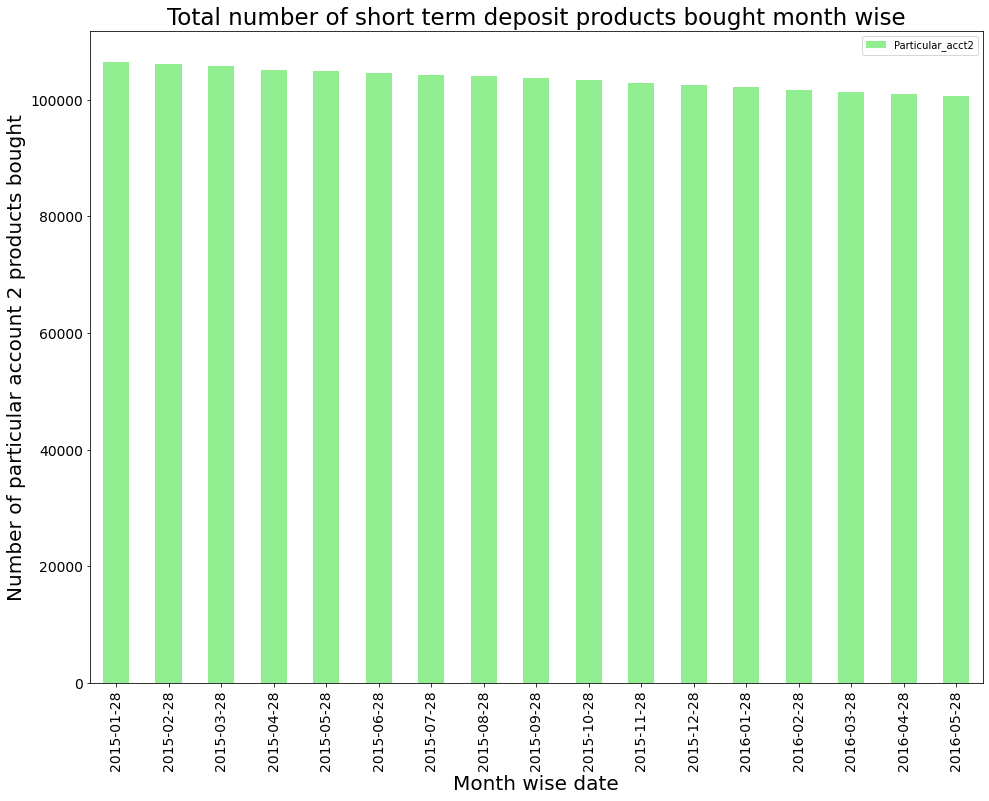

In [46]:
# total number of particular account 2 bought each month

# creating a dataframe with columns Month_status_date and Particular_acct2
month_status_date_vs_particular_accounts2=train.loc[:,['Month_status_date','Particular_acct2']]

# grouping the data by Month_status_date or month wise date and calculating the 
# total number of particular account 2 bought in that month
month_wise_number_of_particular_accounts2_bought=month_status_date_vs_particular_accounts2.groupby(['Month_status_date']).sum()

month_wise_number_of_particular_accounts2_bought.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12],color='lightgreen')
plt.title('Total number of short term deposit products bought month wise', fontsize = 23)
plt.xlabel('Month wise date',fontsize = 20)
plt.ylabel('Number of particular account 2 products bought', fontsize = 20)


# Total number of particular account 3 products bought month wise

Text(0, 0.5, 'Number of particular account 3 products bought')

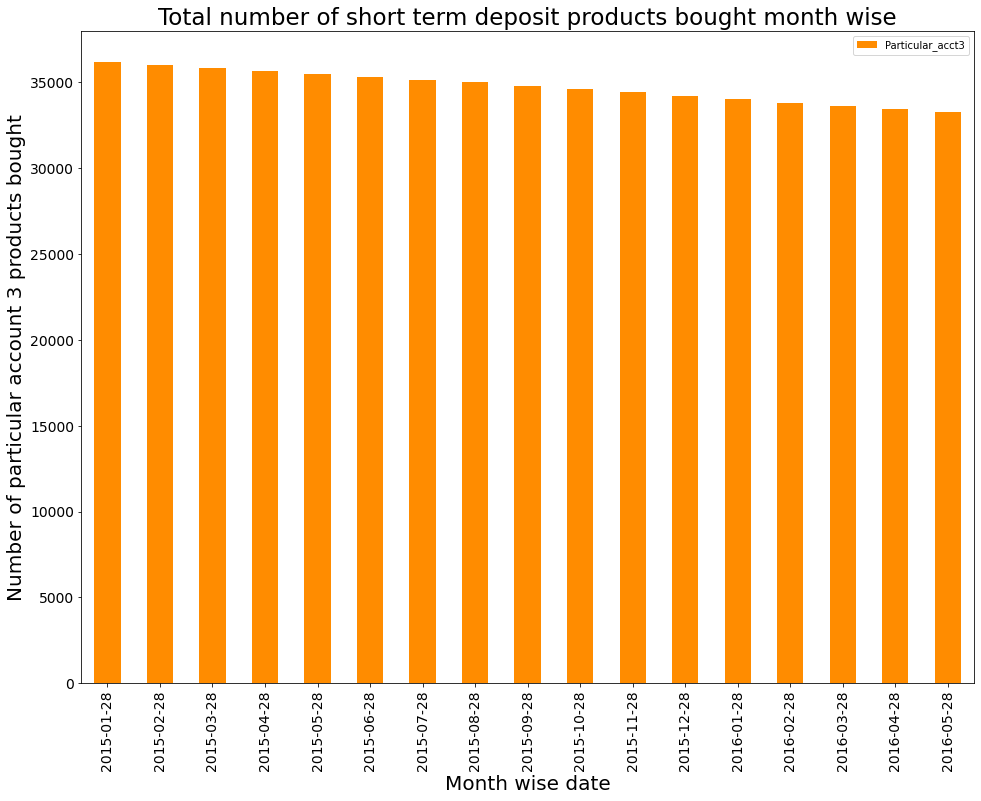

In [45]:
# total number of particular account 3 bought each month

# creating a dataframe with columns Month_status_date and Particular_acct3
month_status_date_vs_particular_accounts3=train.loc[:,['Month_status_date','Particular_acct3']]

# grouping the data by Month_status_date or month wise date and calculating the 
# total number of particular account 3 bought in that month
month_wise_number_of_particular_accounts3_bought=month_status_date_vs_particular_accounts3.groupby(['Month_status_date']).sum()

month_wise_number_of_particular_accounts3_bought.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12],color='darkorange')
plt.title('Total number of short term deposit products bought month wise', fontsize = 23)
plt.xlabel('Month wise date',fontsize = 20)
plt.ylabel('Number of particular account 3 products bought', fontsize = 20)


# Total number of medium term deposit products bought  month wise

Text(0, 0.5, 'Number of medium term deposit products bought')

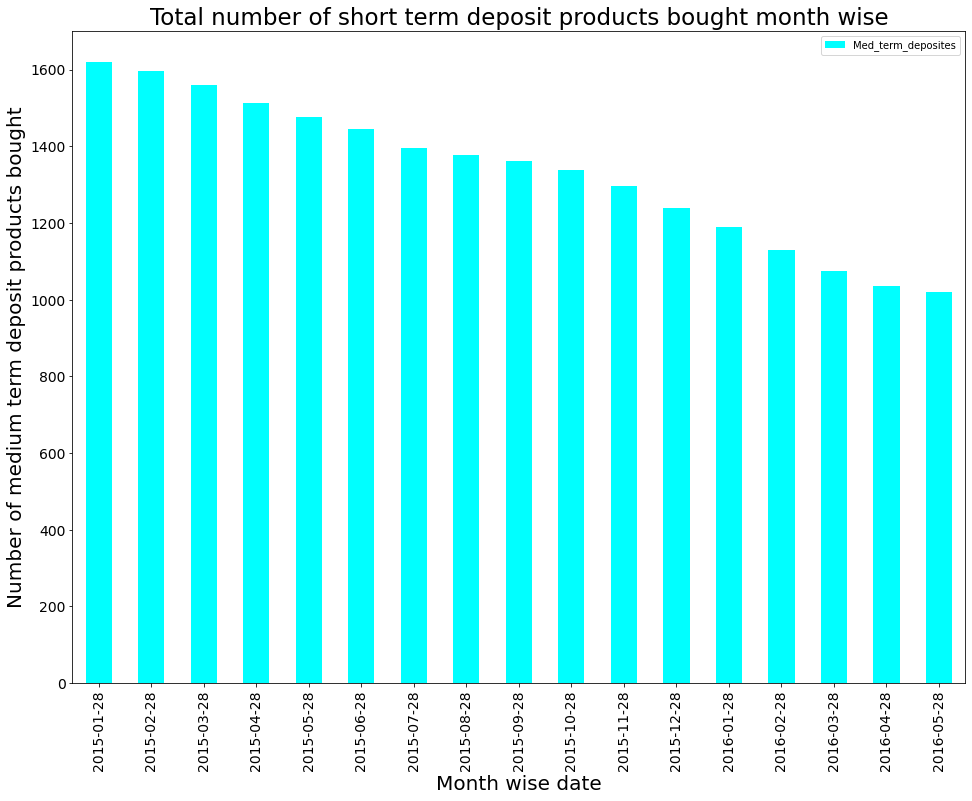

In [44]:
# total number of medium term deposit products bought each month

# creating a dataframe with columns Month_status_date and Med_term_deposites
month_status_date_vs_medium_term_deposits=train.loc[:,['Month_status_date','Med_term_deposites']]

# grouping the data by Month_status_date or month wise date and calculating the 
# total number of medium term deposit products bought in that month
month_wise_number_of_medium_term_deposits_bought=month_status_date_vs_medium_term_deposits.groupby(['Month_status_date']).sum()

month_wise_number_of_medium_term_deposits_bought.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12],color='cyan')
plt.title('Total number of short term deposit products bought month wise', fontsize = 23)
plt.xlabel('Month wise date',fontsize = 20)
plt.ylabel('Number of medium term deposit products bought', fontsize = 20)


# Total number of long term deposit products bought month wise

Text(0, 0.5, 'Number of long term deposit products bought')

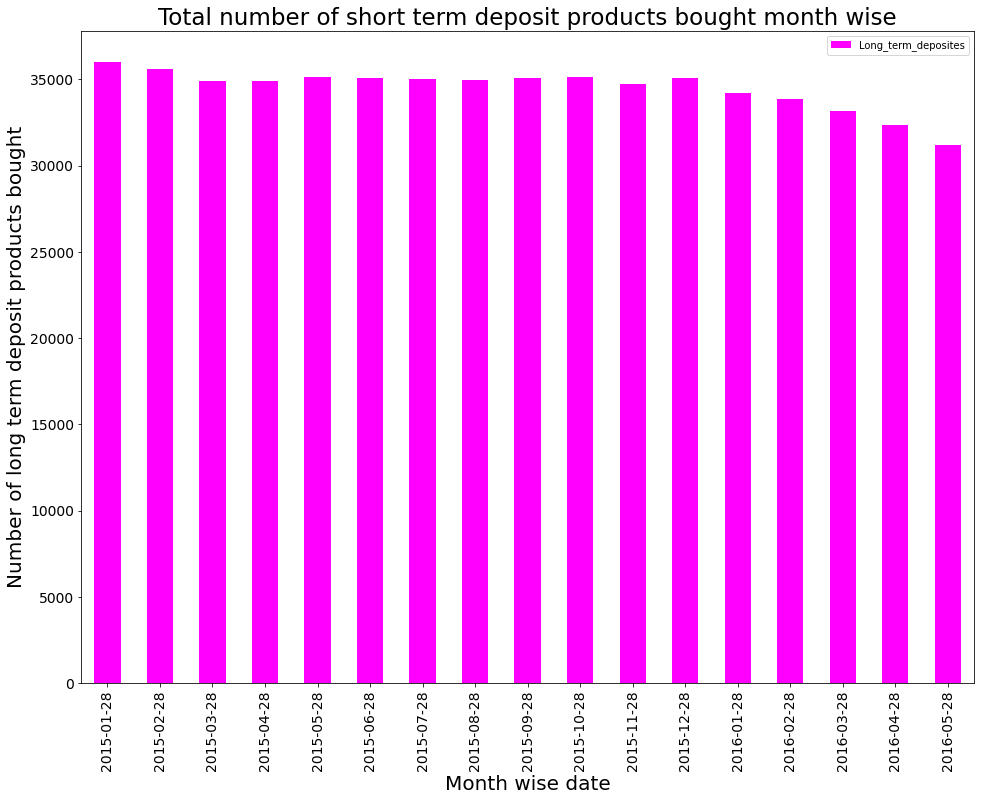

In [43]:
# total number of long term deposit products bought each month

# creating a dataframe with columns Month_status_date and Long_term_deposites
month_status_date_vs_long_term_deposits=train.loc[:,['Month_status_date','Long_term_deposites']]

# grouping the data by Month_status_date or month wise date and calculating the 
# total number of long term deposit products bought in that month
month_wise_number_of_long_term_deposits_bought=month_status_date_vs_long_term_deposits.groupby(['Month_status_date']).sum()

month_wise_number_of_long_term_deposits_bought.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12],color='magenta')
plt.title('Total number of short term deposit products bought month wise', fontsize = 23)
plt.xlabel('Month wise date',fontsize = 20)
plt.ylabel('Number of long term deposit products bought', fontsize = 20)


# Total number of e-accounts bought month wise

Text(0, 0.5, 'Number of e-accounts bought')

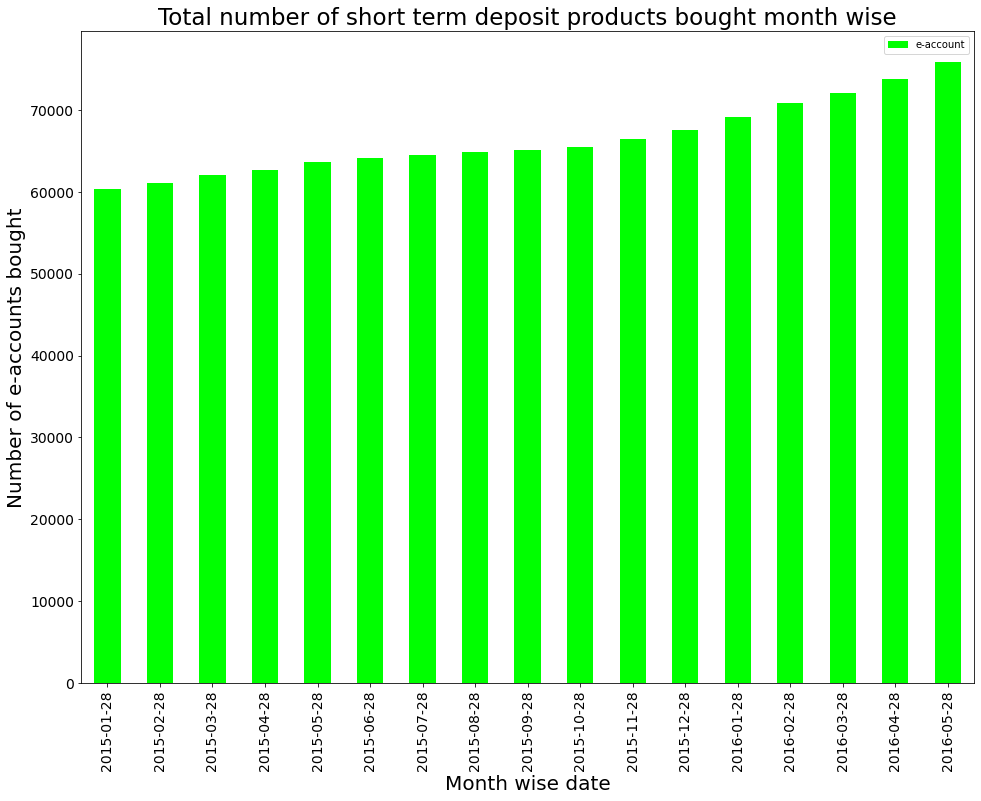

In [42]:
# total number of e-accounts bought each month

# creating a dataframe with columns Month_status_date and e-account
month_status_date_vs_e_accounts=train.loc[:,['Month_status_date','e-account']]

# grouping the data by Month_status_date or month wise date and calculating the 
# total number of e-accounts bought in that month
month_wise_number_of_e_accounts_bought=month_status_date_vs_e_accounts.groupby(['Month_status_date']).sum()

month_wise_number_of_e_accounts_bought.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12],color='lime')
plt.title('Total number of short term deposit products bought month wise', fontsize = 23)
plt.xlabel('Month wise date',fontsize = 20)
plt.ylabel('Number of e-accounts bought', fontsize = 20)


# Total number of funds products bought month wise

Text(0, 0.5, 'Number of funds products bought')

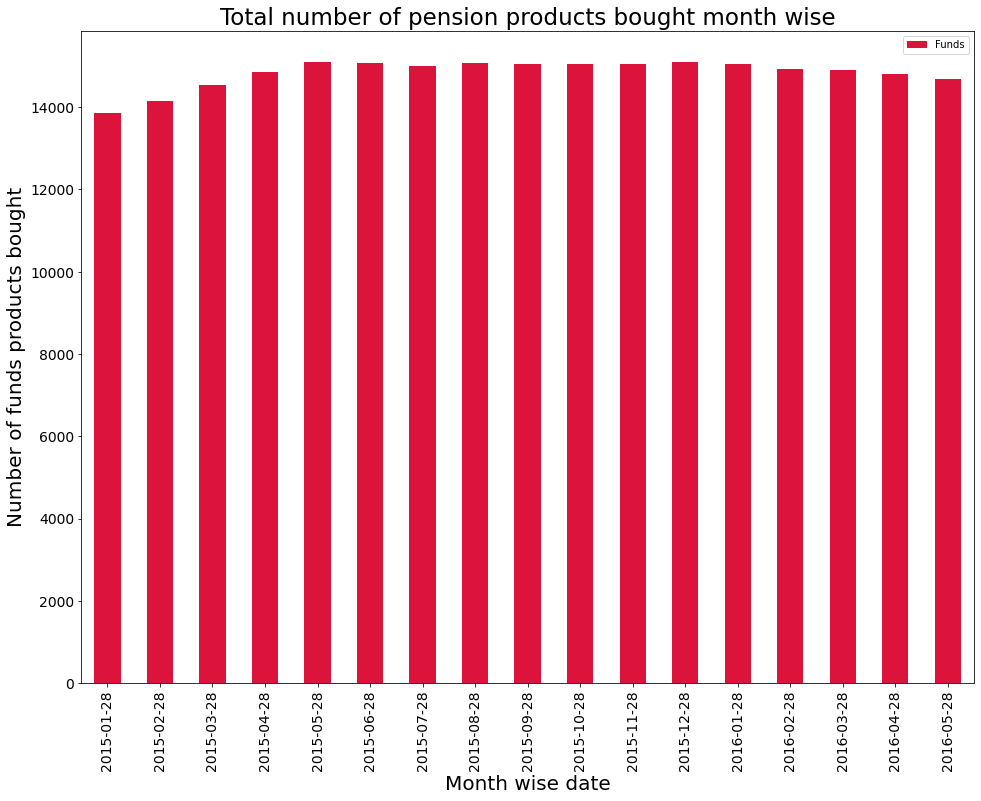

In [41]:
# total number of funds bought each month

# creating a dataframe with columns Month_status_date and Funds
month_status_date_vs_funds=train.loc[:,['Month_status_date','Funds']]

# grouping the data by Month_status_date or month wise date and calculating the 
# total number of funds bought in that month
month_wise_number_of_funds_bought=month_status_date_vs_funds.groupby(['Month_status_date']).sum()

month_wise_number_of_funds_bought.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12],color='crimson')
plt.title('Total number of pension products bought month wise', fontsize = 23)
plt.xlabel('Month wise date',fontsize = 20)
plt.ylabel('Number of funds products bought', fontsize = 20)


# Total number of mortgage products bought month wise

Text(0, 0.5, 'Number of mortgage products bought')

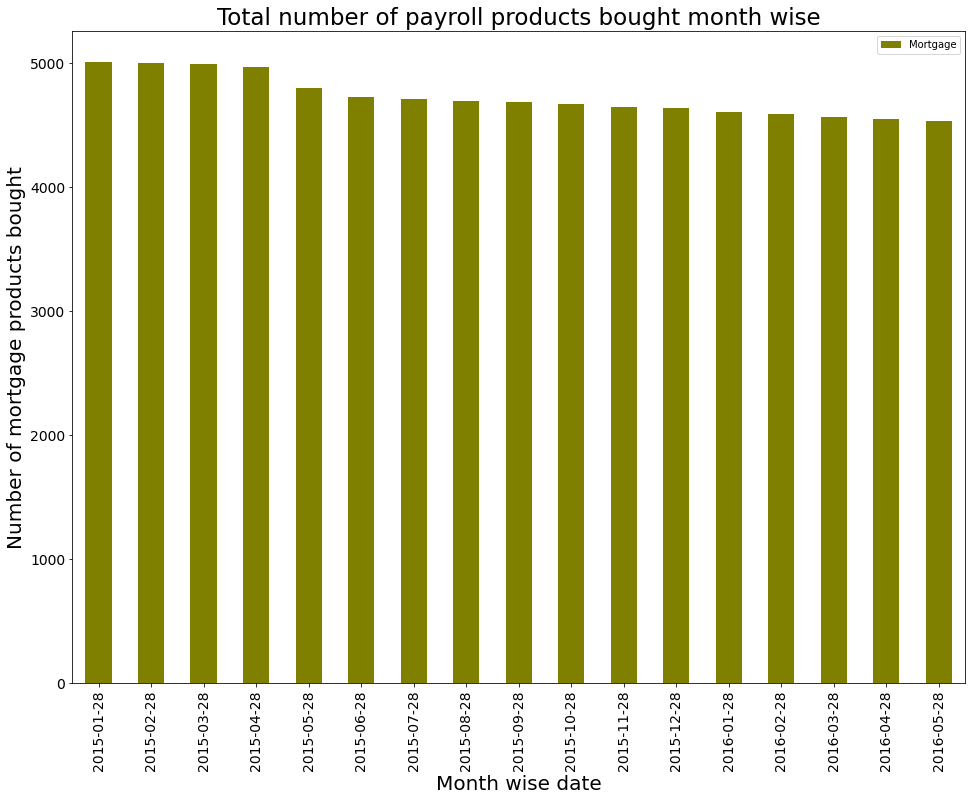

In [40]:
# total number of mortgages bought each month

# creating a dataframe with columns Month_status_date and Mortgage
month_status_date_vs_mortgage=train.loc[:,['Month_status_date','Mortgage']]

# grouping the data by Month_status_date or month wise date and calculating the 
# total number of mortgages bought in that month
month_wise_number_of_mortgages_bought=month_status_date_vs_mortgage.groupby(['Month_status_date']).sum()

month_wise_number_of_mortgages_bought.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12],color='olive')
plt.title('Total number of payroll products bought month wise', fontsize = 23)
plt.xlabel('Month wise date',fontsize = 20)
plt.ylabel('Number of mortgage products bought', fontsize = 20)


# Total number of pension products bought month wise

Text(0, 0.5, 'Number of pension products bought')

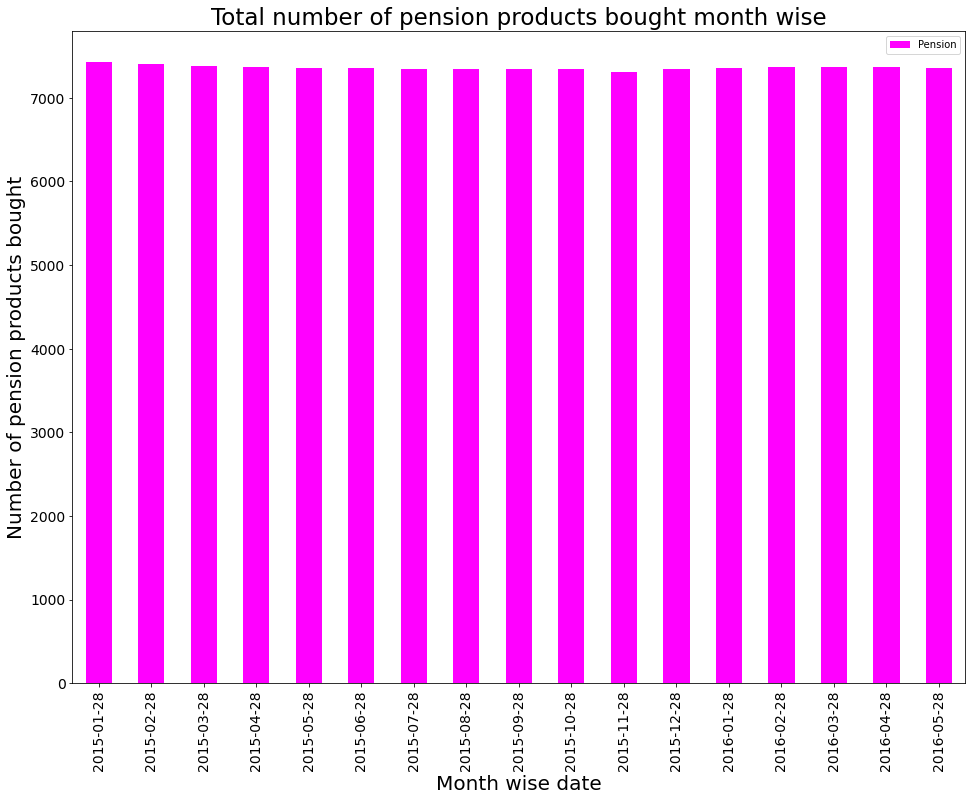

In [31]:
# total number of pension products bought each month

# creating a dataframe with columns Month_status_date and Pension
month_status_date_vs_pension=train.loc[:,['Month_status_date','Pension']]

# grouping the data by Month_status_date or month wise date and calculating the 
# total number of pension products bought in that month
month_wise_number_of_pension_bought=month_status_date_vs_pension.groupby(['Month_status_date']).sum()

month_wise_number_of_pension_bought.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12],color='fuchsia')
plt.title('Total number of pension products bought month wise', fontsize = 23)
plt.xlabel('Month wise date',fontsize = 20)
plt.ylabel('Number of pension products bought', fontsize = 20)


# Total number of loans bought month wise

Text(0, 0.5, 'Number of loan products bought')

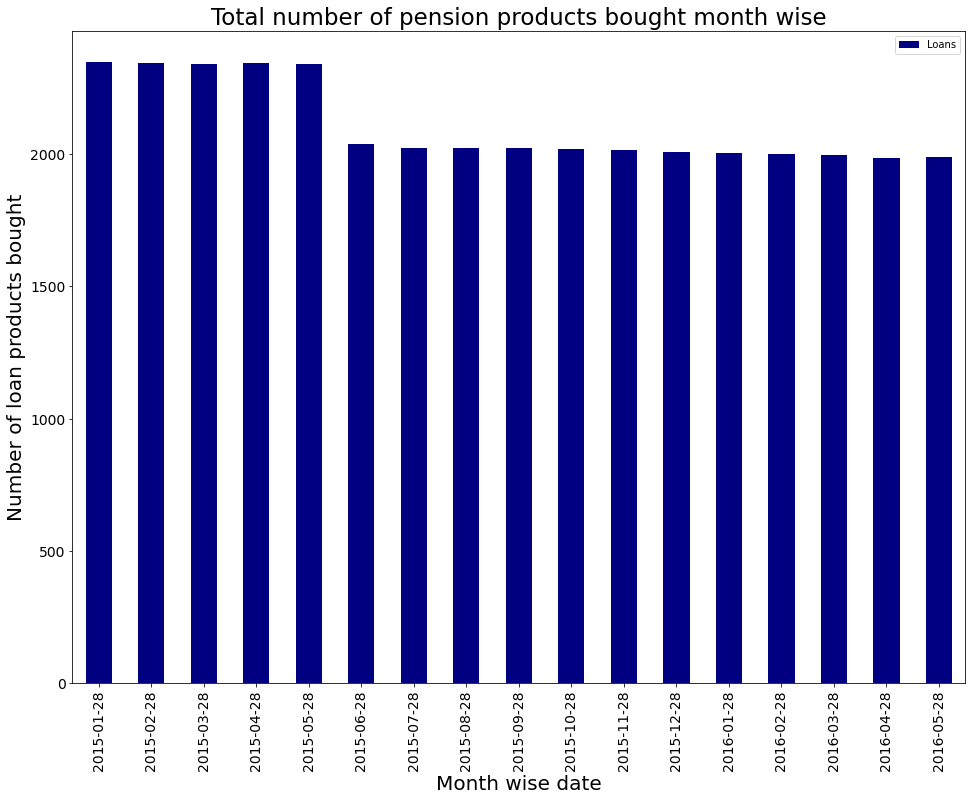

In [39]:
# total number of loans bought each month

# creating a dataframe with columns Month_status_date and Loans
month_status_date_vs_loans=train.loc[:,['Month_status_date','Loans']]

# grouping the data by Month_status_date or month wise date and calculating the 
# total number of loans bought in that month
month_wise_number_of_loans_bought=month_status_date_vs_loans.groupby(['Month_status_date']).sum()

month_wise_number_of_loans_bought.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12],color='navy')
plt.title('Total number of pension products bought month wise', fontsize = 23)
plt.xlabel('Month wise date',fontsize = 20)
plt.ylabel('Number of loan products bought', fontsize = 20)


# Total number of tax products bought month wise

Text(0, 0.5, 'Number of tax products bought')

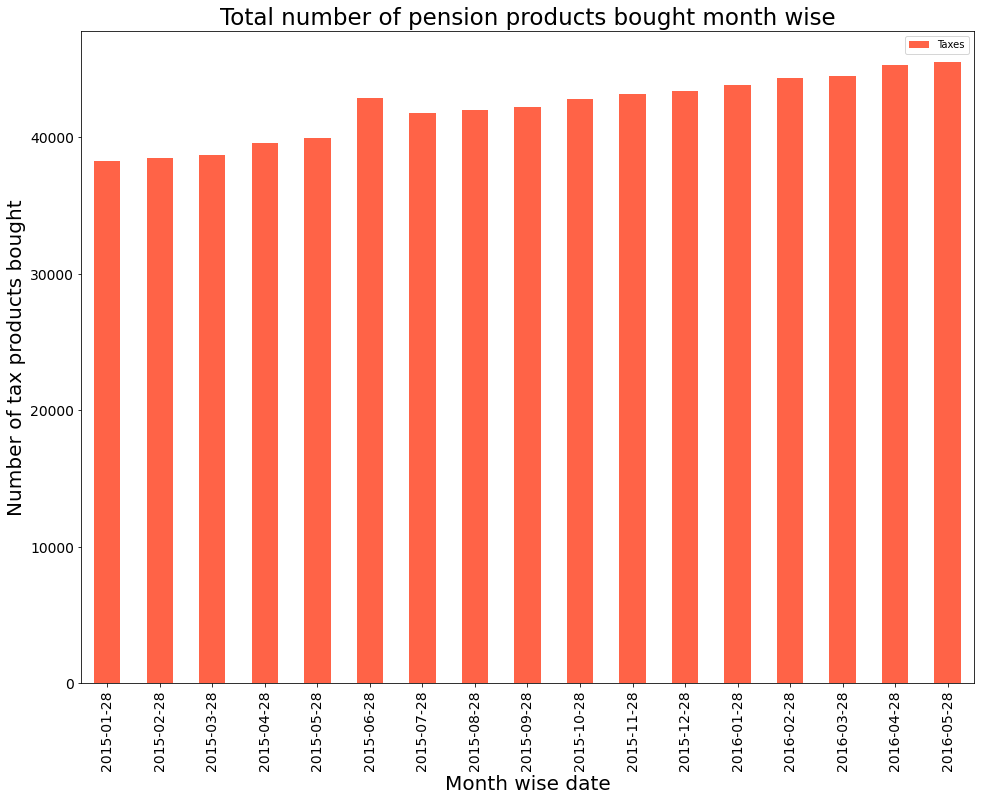

In [38]:
# total number of taxes bought each month

# creating a dataframe with columns Month_status_date and Taxes
month_status_date_vs_taxes=train.loc[:,['Month_status_date','Taxes']]

# grouping the data by Month_status_date or month wise date and calculating the 
# total number of taxes bought in that month
month_wise_number_of_taxes_bought=month_status_date_vs_taxes.groupby(['Month_status_date']).sum()

month_wise_number_of_taxes_bought.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12],color='tomato')
plt.title('Total number of pension products bought month wise', fontsize = 23)
plt.xlabel('Month wise date',fontsize = 20)
plt.ylabel('Number of tax products bought', fontsize = 20)


# Total number of security products bought month wise

Text(0, 0.5, 'Number of security products bought')

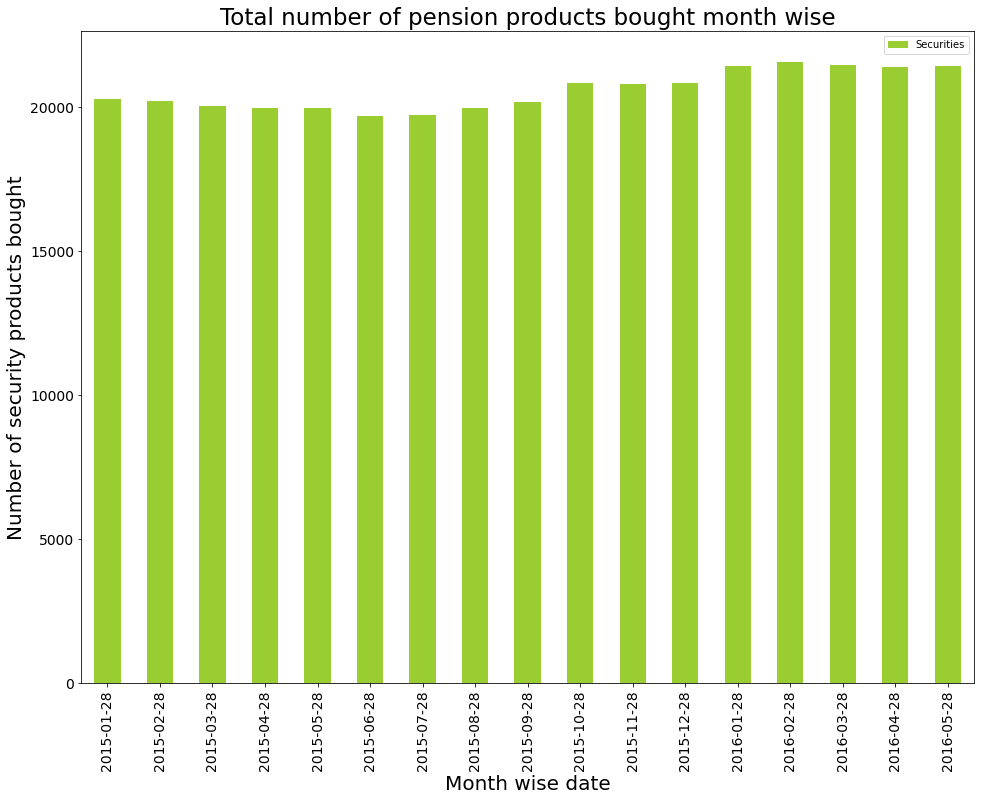

In [37]:
# total number of securities bought each month

# creating a dataframe with columns Month_status_date and Securities
month_status_date_vs_securities=train.loc[:,['Month_status_date','Securities']]

# grouping the data by Month_status_date or month wise date and calculating the 
# total number of securities bought in that month
month_wise_number_of_securities_bought=month_status_date_vs_securities.groupby(['Month_status_date']).sum()

month_wise_number_of_securities_bought.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12],color='yellowgreen')
plt.title('Total number of pension products bought month wise', fontsize = 23)
plt.xlabel('Month wise date',fontsize = 20)
plt.ylabel('Number of security products bought', fontsize = 20)


# Total number of home accounts bought month wise

Text(0, 0.5, 'Number of home accounts bought')

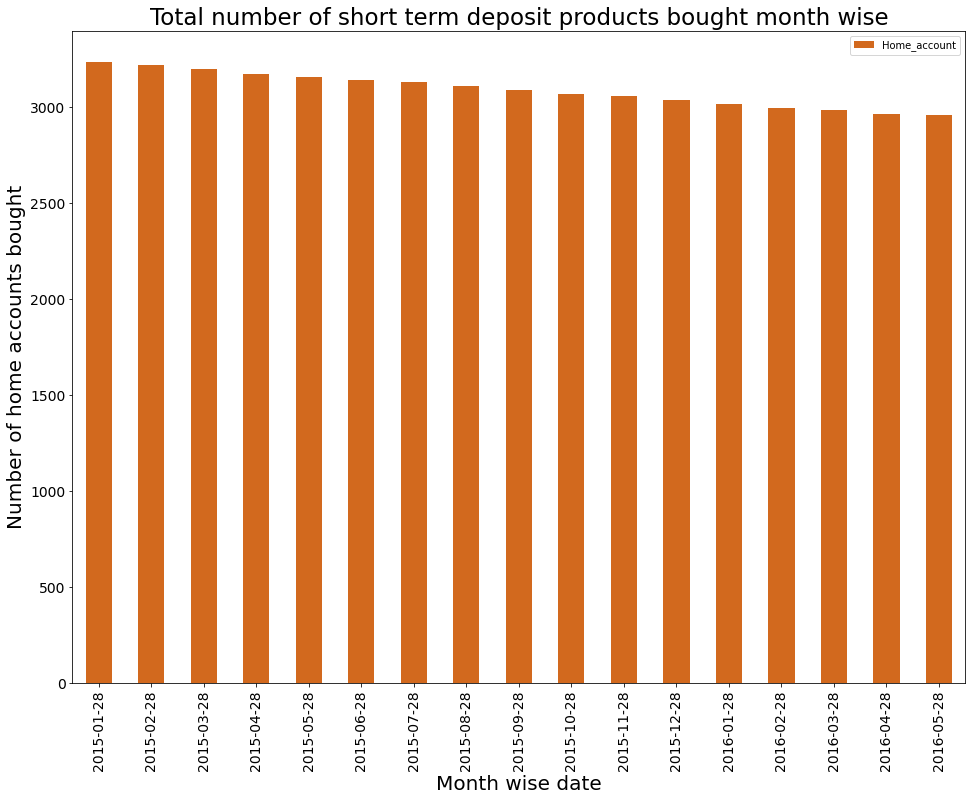

In [36]:
# total number of home accounts bought each month

# creating a dataframe with columns Month_status_date and Home_account
month_status_date_vs_home_accounts=train.loc[:,['Month_status_date','Home_account']]

# grouping the data by Month_status_date or month wise date and calculating the 
# total number of home accounts bought in that month
month_wise_number_of_home_accounts_bought=month_status_date_vs_home_accounts.groupby(['Month_status_date']).sum()

month_wise_number_of_home_accounts_bought.plot(kind='bar' , stacked=True, fontsize=14, figsize=[16,12],color='chocolate')
plt.title('Total number of short term deposit products bought month wise', fontsize = 23)
plt.xlabel('Month wise date',fontsize = 20)
plt.ylabel('Number of home accounts bought', fontsize = 20)


### CONCLUSION

- Products for which demand is increasing are as follows: Cuurent Account, Direct Debit, Payroll Account, E-Account, Funds, Taxes, Securities and Derivative Account.

- Products for which demand is decreasing are as follows: Short Term Deposit, Saving Account, Guarantees, Med Term Deposites, Long Term Depsites, Mortgage, Home Account and Particular Account3

- Particular Account 1 shows seasonality trend i.e., it's demand deccreases from janurary to june and then it increase from August to December.

- Pension and Payroll shows similar trend which means customer who are buying pension products are also buying payroll product.